# Step 1. 데이터 분석

## 데이터 읽어오기
---
* Province : 특별시, 광역시, 도
* City : 구, 군, 시
* Population : 인구수
* Households : 가구수
* PersInHou : 평균가구원수
* Male : 남성인구
* Female : 여성인구
* GenderRatio : 성비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import csv

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'NanumGothic'

#폰트 설정

plt.rcParams['font.size'] = 12.
# 폰트 사이즈

plt.rcParams['xtick.labelsize'] = 24.
# x축 라벨사이즈

plt.rcParams['ytick.labelsize'] = 24.
# y축 라벨사이즈

plt.rcParams['axes.labelsize'] = 20.
#그래프 축 폰트사이즈

In [3]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)

for row in data:
    print(row)

['', 'Province', 'City', 'Population', 'Households', 'PersInHou', 'Male', 'Female', 'GenderRatio']
['1', '서울특별시', ' ', '10078850', '4197478', '2.4', '4962774', '5116076', '0.97']
['2', '서울특별시', '종로구 ', '155695', '72882', '2.14', '76962', '78733', '0.98']
['3', '서울특별시', '중구 ', '126817', '59614', '2.13', '63292', '63525', '1']
['4', '서울특별시', '용산구 ', '235186', '108138', '2.17', '114119', '121067', '0.94']
['5', '서울특별시', '성동구 ', '298145', '126915', '2.35', '148265', '149880', '0.99']
['6', '서울특별시', '광진구 ', '362197', '158769', '2.28', '177946', '184251', '0.97']
['7', '서울특별시', '동대문구 ', '362604', '160110', '2.26', '181825', '180779', '1.01']
['8', '서울특별시', '중랑구 ', '417976', '177077', '2.36', '208657', '209319', '1']
['9', '서울특별시', '성북구 ', '464176', '192670', '2.41', '227676', '236500', '0.96']
['10', '서울특별시', '강북구 ', '333523', '141325', '2.36', '164304', '169219', '0.97']
['11', '서울특별시', '도봉구 ', '353284', '137260', '2.57', '174075', '179209', '0.97']
['12', '서울특별시', '노원구 ', '579324', '220403

# Step 2. 적절한 feature를 선택해 데이터 전처리

In [4]:
print(row[-1])

1.02


데이터의 맨 윗줄에 있는 헤더 부분을 `next()` 함수를 사용해 제외시키고, `City`칼럼에 없는 값들은 제외하고 `Population`을 출력해보자.

In [5]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

for row in data:
    if row[2] != " ":
        print(row[3])

155695
126817
235186
298145
362197
362604
417976
464176
333523
353284
579324
499399
307843
389937
485800
588559
425288
238367
381647
406536
512921
447076
575912
664804
465834
46519
117028
93456
130825
386303
273857
286051
306292
423428
340788
248177
86771
207314
179815
240772
150095
80793
349742
207902
162168
443447
452147
606232
188706
114125
73495
406990
311316
523673
557762
337721
500981
67383
20825
100554
308346
220613
448490
398971
242758
258365
494953
330231
199349
241745
345481
174903
190203
217436
1177851
300501
343624
201569
332157
972466
221336
250637
500493
431149
599215
247111
352104
852220
442854
224374
184992
346565
454231
97494
703973
380882
323091
1015972
432114
284894
298964
69922
186772
642958
207744
392978
288519
157933
157007
970062
220985
406765
342312
417353
205239
181445
345128
568265
305770
203695
155740
110677
45333
61693
106694
276834
329359
215089
94117
47994
82079
71564
70400
45573
40113
43624
39284
49122
26790
24283
33352
30066
27523
832387
178536
222817
25

## 데이터 리스트에 저장하기
---
`Population` 데이터를 저장해보자. 지역 순으로 저장하고자 `result` 리스트를 새로 만들고 데이터가 존재하는 지역의 데이터를 `result` 리스트에 저장하자.

In [6]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

result = [] #population 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": #결측치값 제거
        result.append(row[3]) #result 리스트에 population 값 추가
print(result)

['155695', '126817', '235186', '298145', '362197', '362604', '417976', '464176', '333523', '353284', '579324', '499399', '307843', '389937', '485800', '588559', '425288', '238367', '381647', '406536', '512921', '447076', '575912', '664804', '465834', '46519', '117028', '93456', '130825', '386303', '273857', '286051', '306292', '423428', '340788', '248177', '86771', '207314', '179815', '240772', '150095', '80793', '349742', '207902', '162168', '443447', '452147', '606232', '188706', '114125', '73495', '406990', '311316', '523673', '557762', '337721', '500981', '67383', '20825', '100554', '308346', '220613', '448490', '398971', '242758', '258365', '494953', '330231', '199349', '241745', '345481', '174903', '190203', '217436', '1177851', '300501', '343624', '201569', '332157', '972466', '221336', '250637', '500493', '431149', '599215', '247111', '352104', '852220', '442854', '224374', '184992', '346565', '454231', '97494', '703973', '380882', '323091', '1015972', '432114', '284894', '2989

데이터가 너무 많아서 보기 힘들다 `len()` 함수로 데이터의 갯수를 확인하자.

In [7]:
len(result)

263

# Step 3. feature에 맞는 그래프(꺾은선 그래프 / 히스토그램)를 선택해 데이터 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


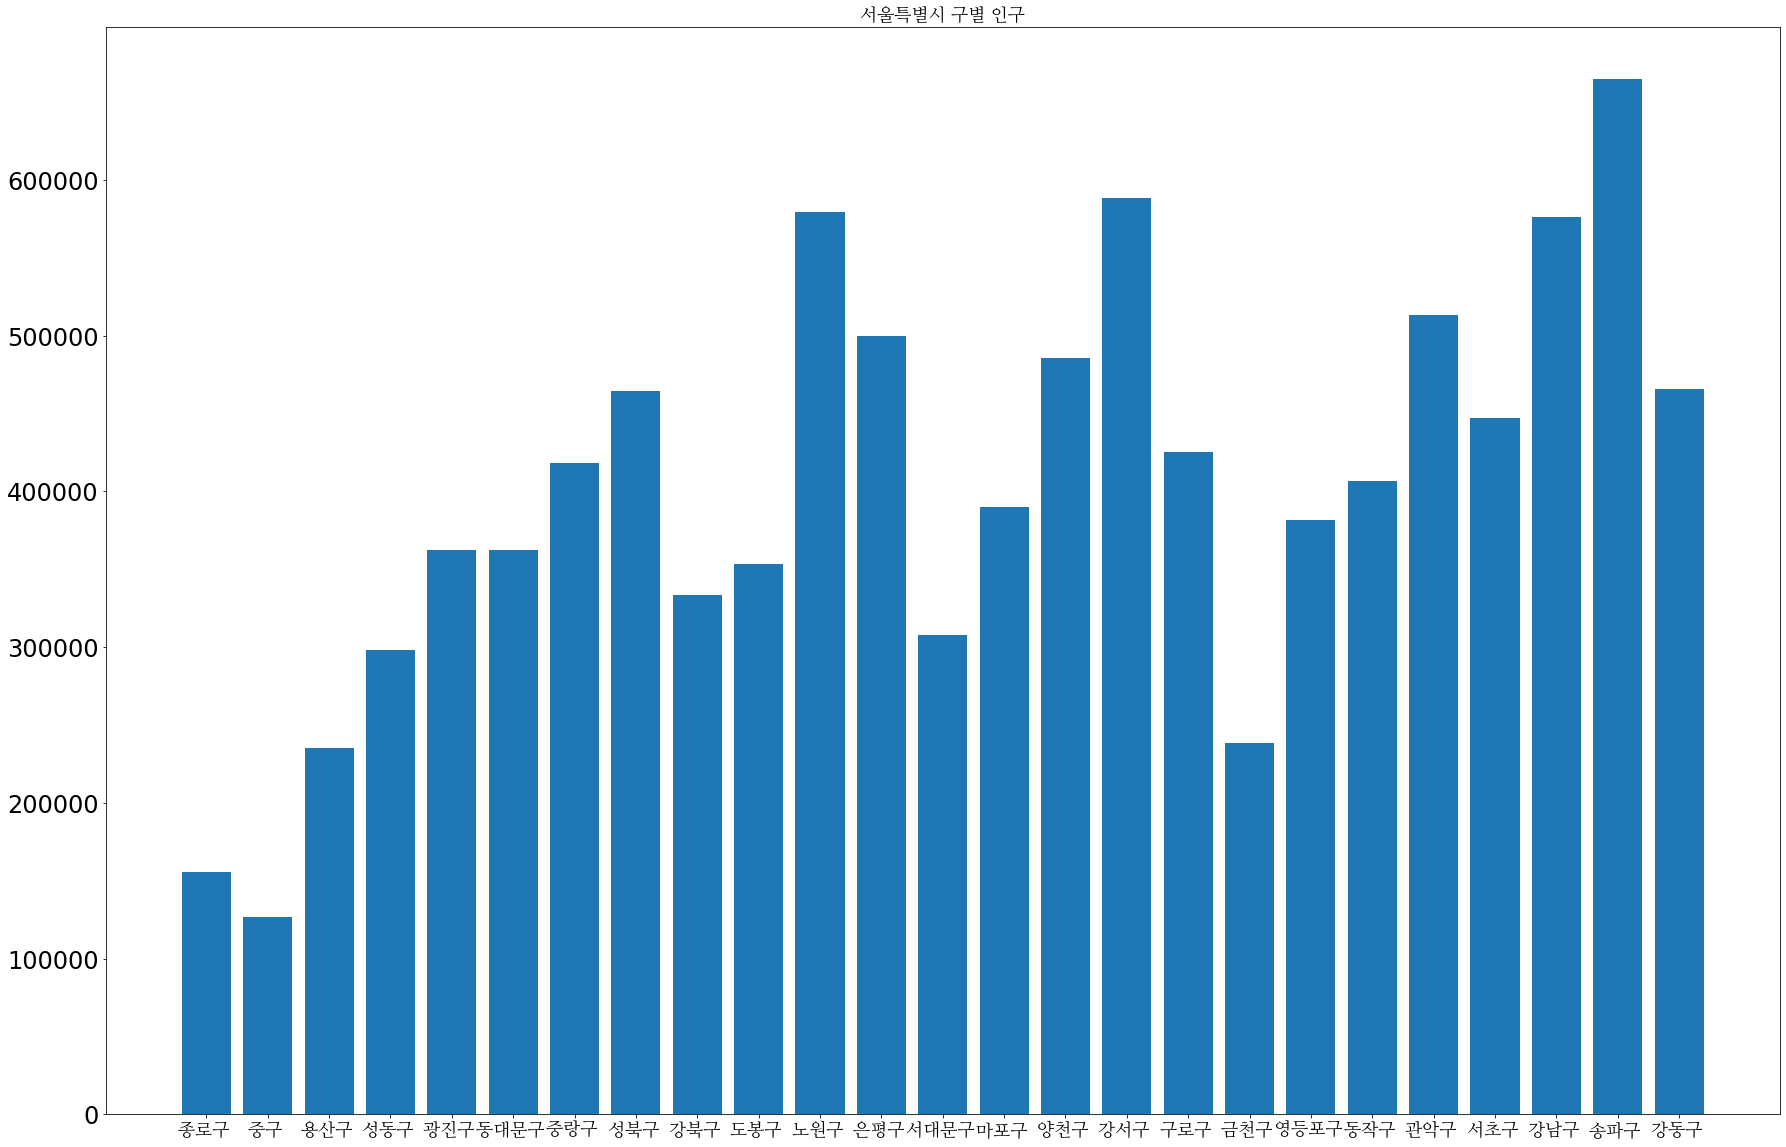

In [8]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

seoul_pop = [] #Population 데이터를 저장할 리스트 생성
seoul_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '서울특별시': #서울특별시에 해당하는 값이라면
            seoul_pop.append(float(row[3])) # seoul_pop 리스트에 Population 값 추가
            seoul_city.append(str(row[2])) # seoul_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=18)
            
plt.figure(figsize=(30, 20))           
plt.bar(seoul_city, seoul_pop)
plt.xticks(seoul_city, fontproperties=fontprop)
plt.title('서울특별시 구별 인구', fontproperties=fontprop)

plt.show()

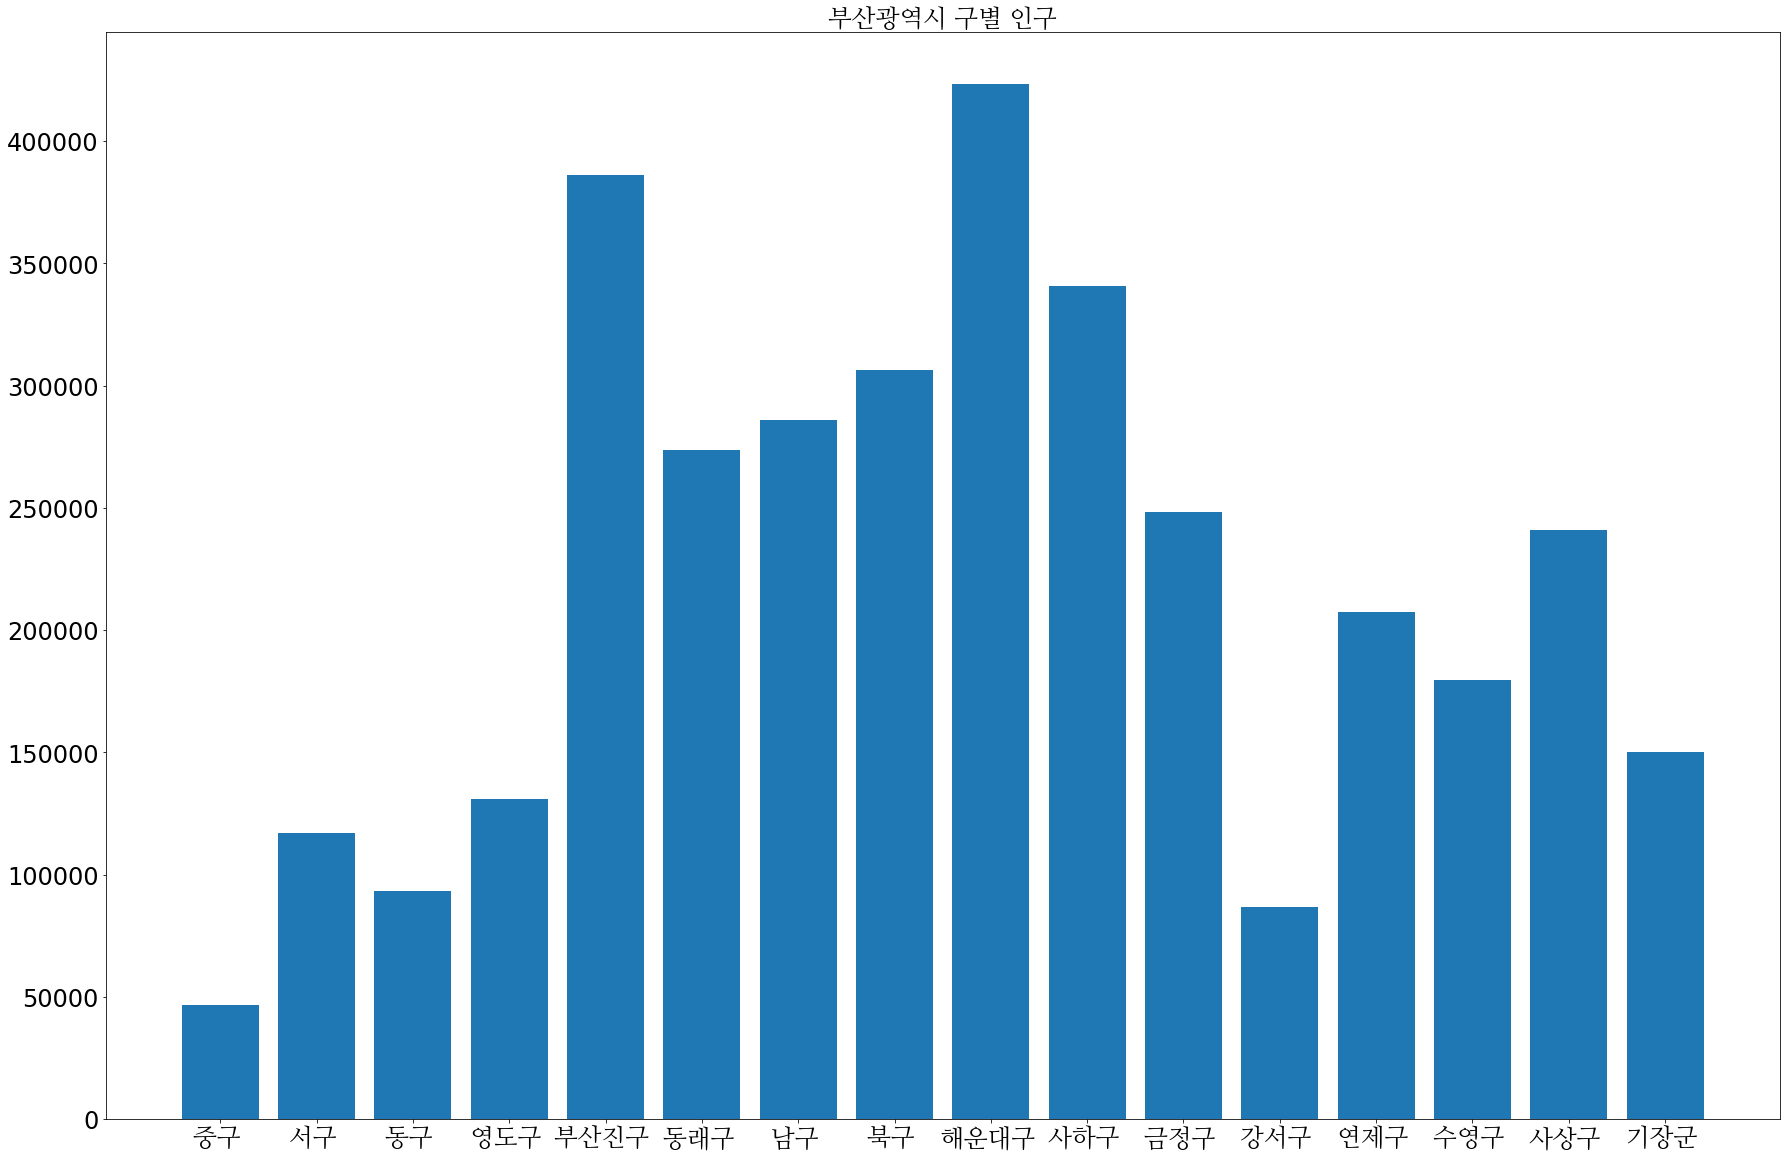

In [9]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

busan_pop = [] #Population 데이터를 저장할 리스트 생성
busan_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '부산광역시': #부산광역시에 해당하는 값이라면
            busan_pop.append(float(row[3])) # busan_pop 리스트에 Population 값 추가
            busan_city.append(str(row[2])) # busan_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(busan_city, busan_pop)
plt.xticks(busan_city, fontproperties=fontprop)
plt.title('부산광역시 구별 인구', fontproperties=fontprop)

plt.show()

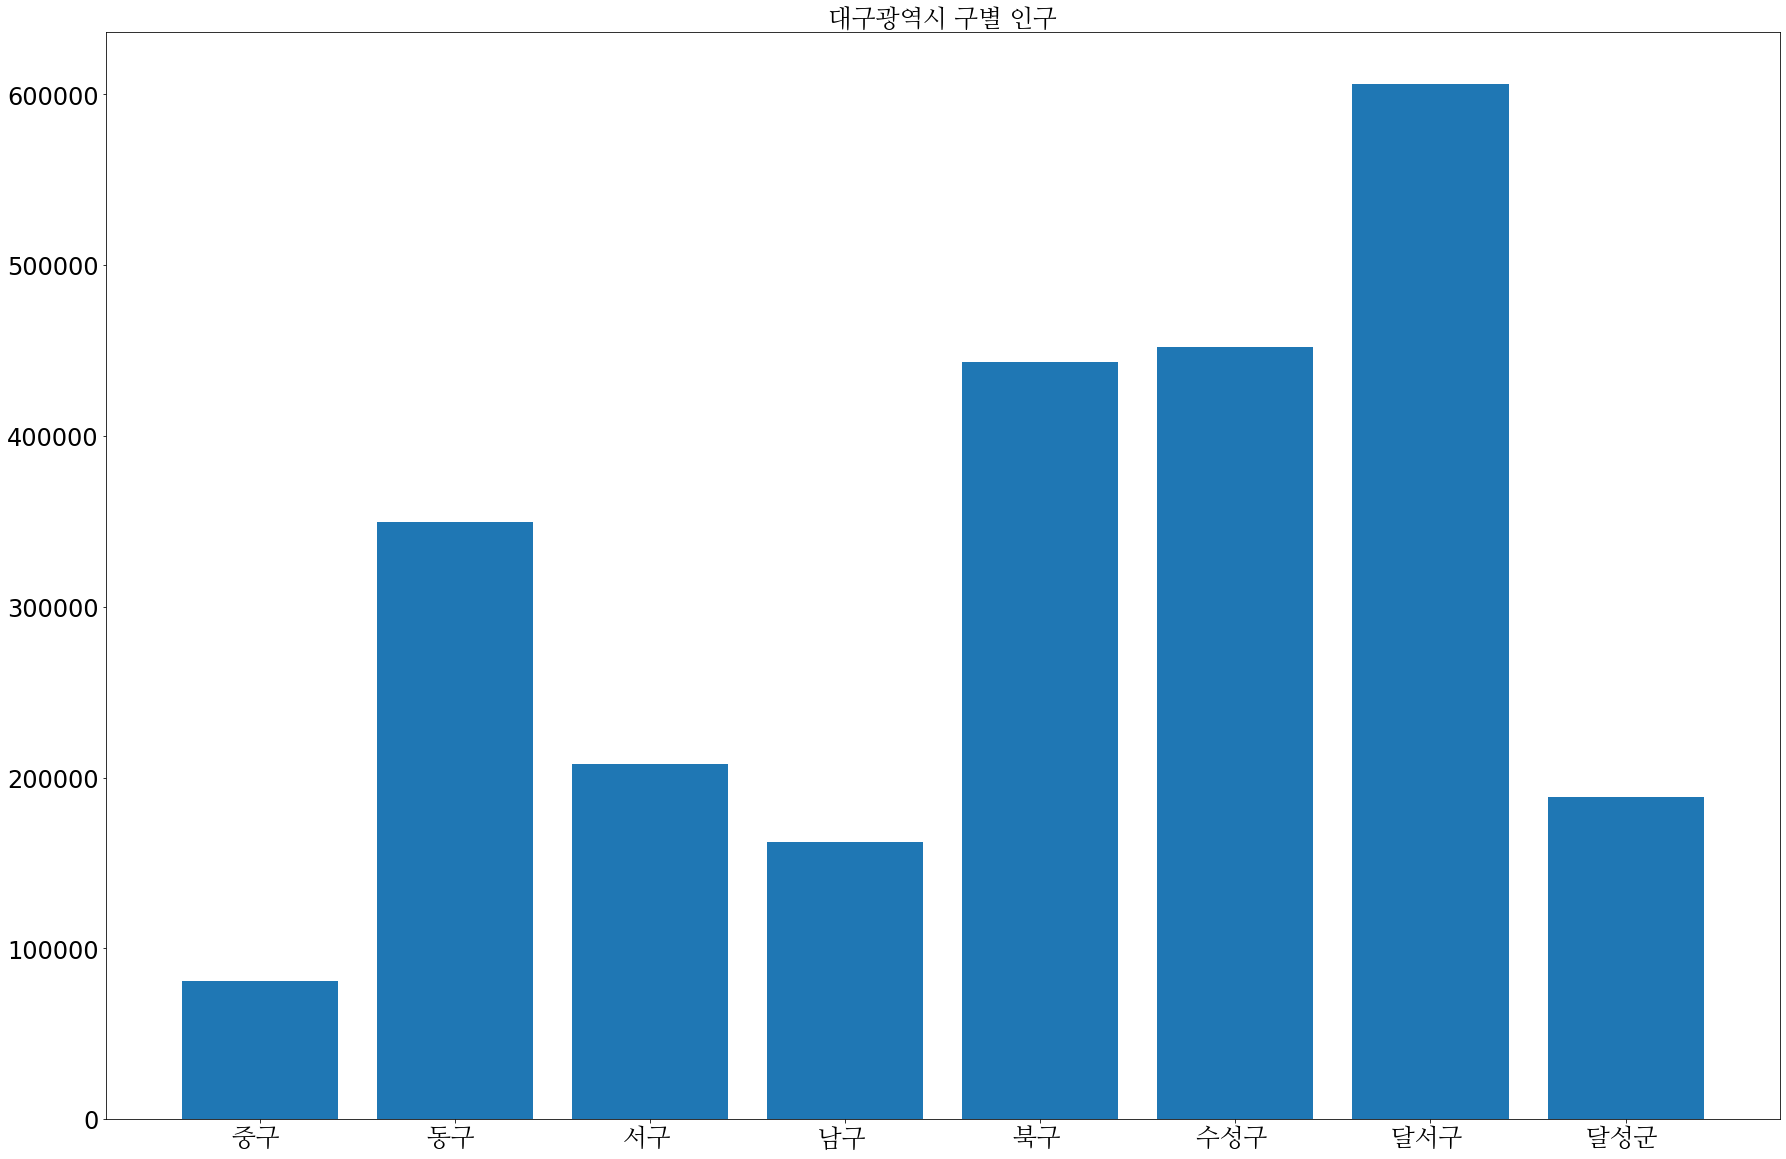

In [10]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

daegu_pop = [] #Population 데이터를 저장할 리스트 생성
daegu_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '대구광역시': #대구광역시에 해당하는 값이라면
            daegu_pop.append(float(row[3])) # daegu_pop 리스트에 Population 값 추가
            daegu_city.append(str(row[2])) # daegu_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(daegu_city, daegu_pop)
plt.xticks(daegu_city, fontproperties=fontprop)
plt.title('대구광역시 구별 인구', fontproperties=fontprop)

plt.show()

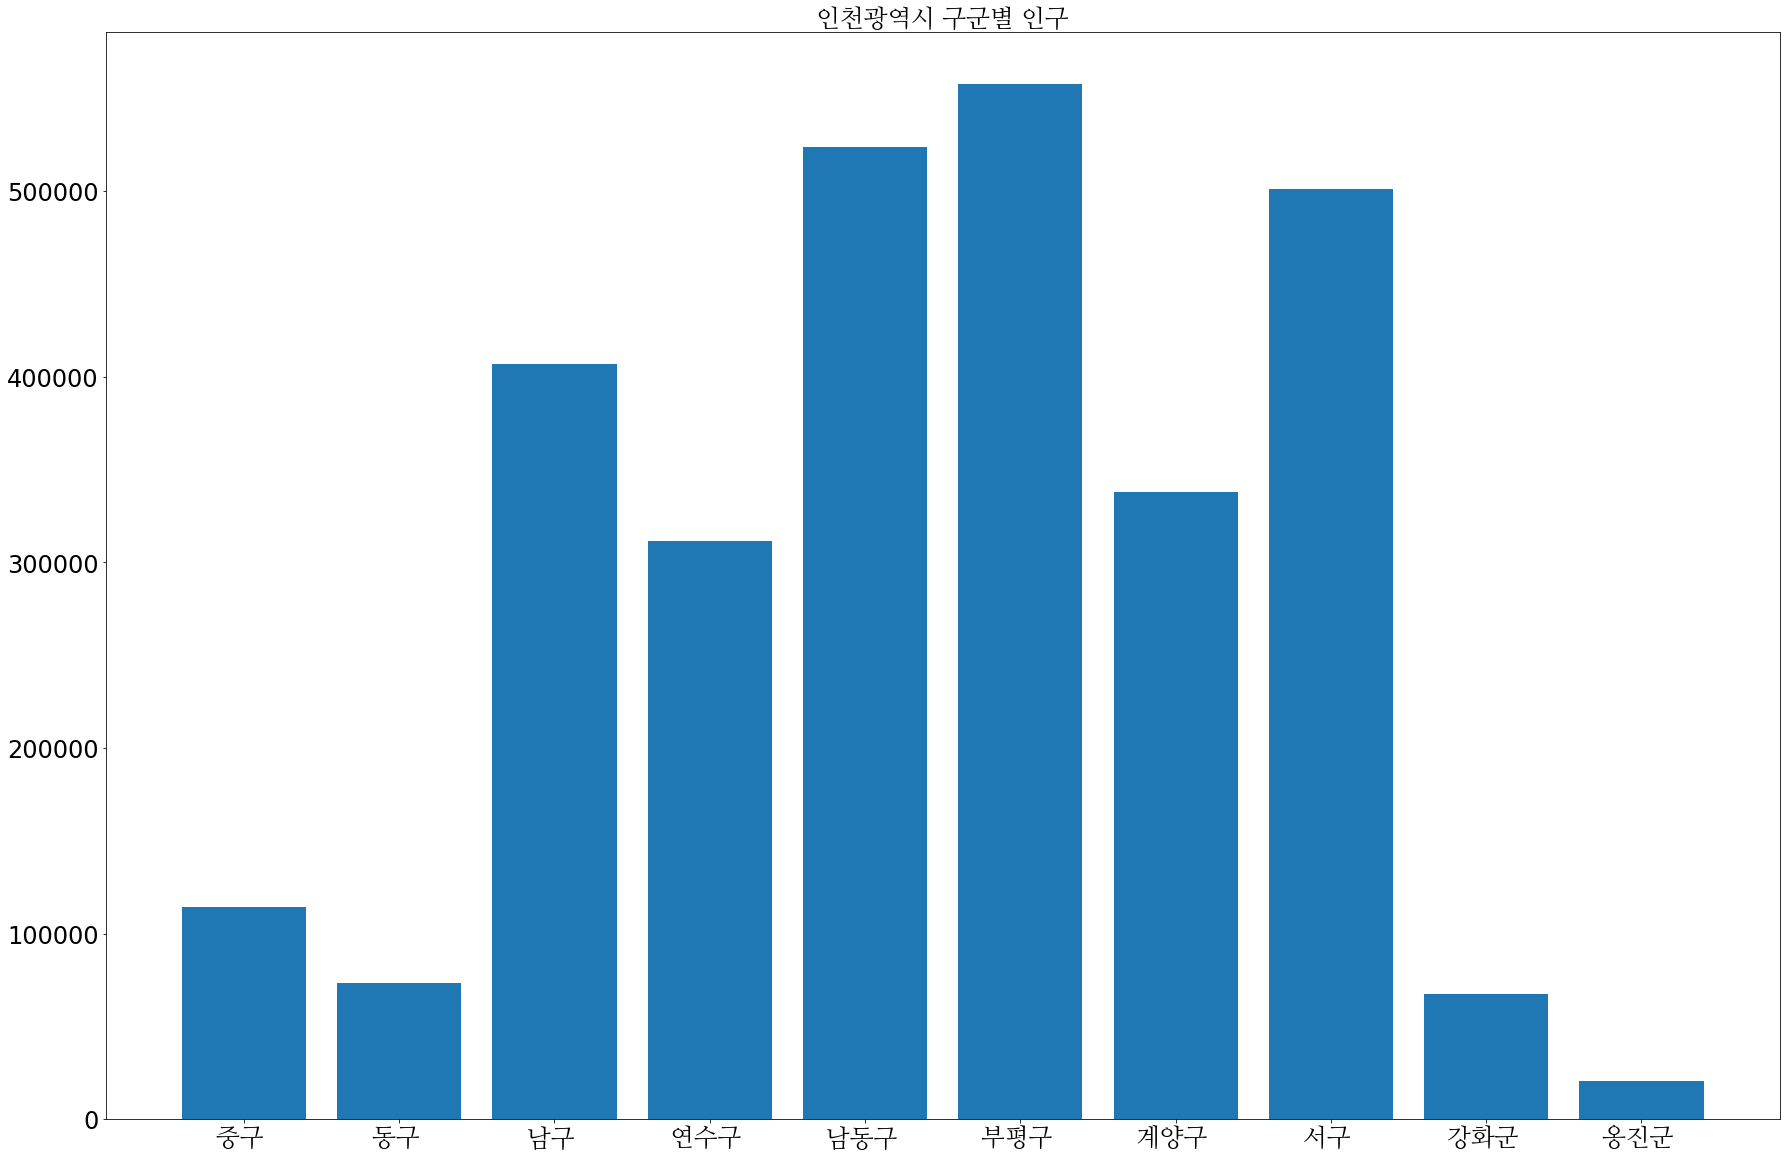

In [11]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

incheon_pop = [] #Population 데이터를 저장할 리스트 생성
incheon_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '인천광역시': #인천광역시에 해당하는 값이라면
            incheon_pop.append(float(row[3])) # incheon_pop 리스트에 Population 값 추가
            incheon_city.append(str(row[2])) # incheon_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(incheon_city, incheon_pop)
plt.xticks(incheon_city, fontproperties=fontprop)
plt.title('인천광역시 구군별 인구', fontproperties=fontprop)

plt.show()

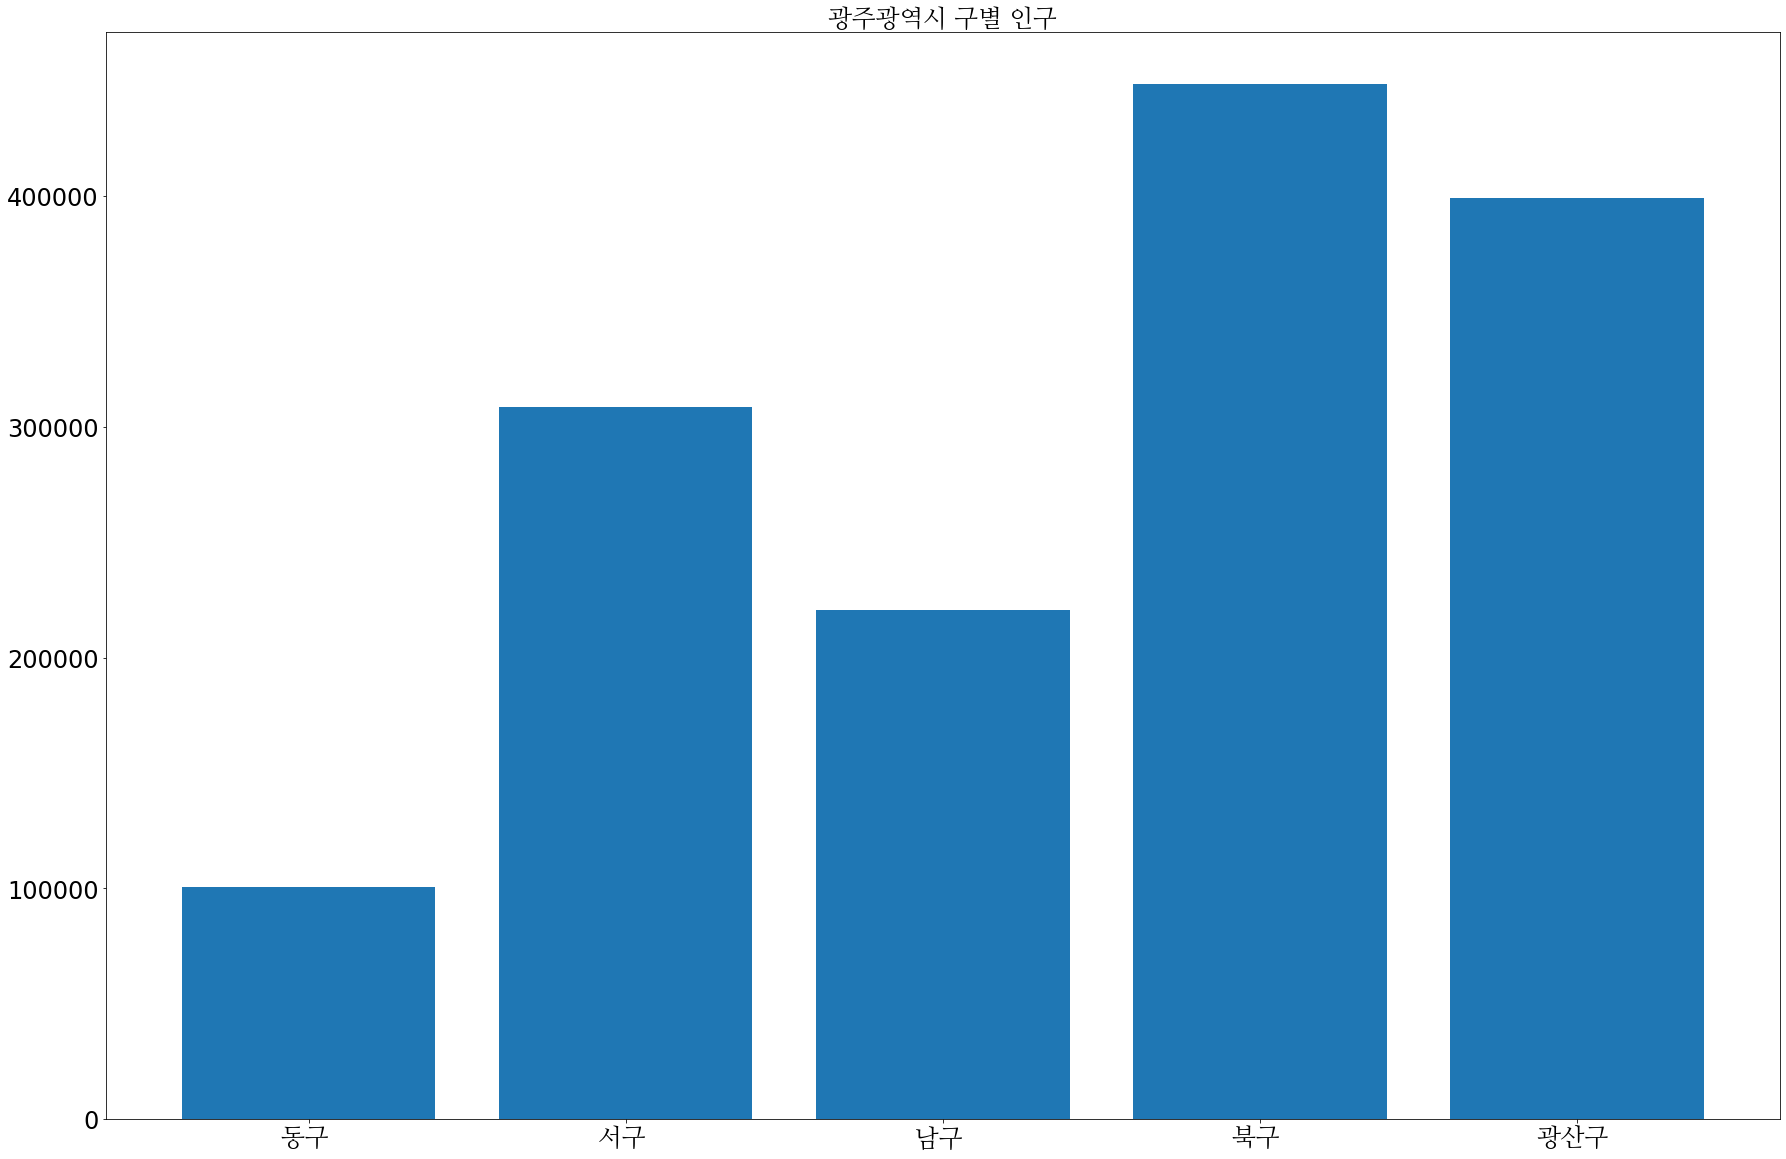

In [12]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

gwangju_pop = [] #Population 데이터를 저장할 리스트 생성
gwangju_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '광주광역시': #광주광역시에 해당하는 값이라면
            gwangju_pop.append(float(row[3])) # gwangju_pop 리스트에 Population 값 추가
            gwangju_city.append(str(row[2])) # gwangju_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(gwangju_city, gwangju_pop)
plt.xticks(gwangju_city, fontproperties=fontprop)
plt.title('광주광역시 구별 인구', fontproperties=fontprop)

plt.show()

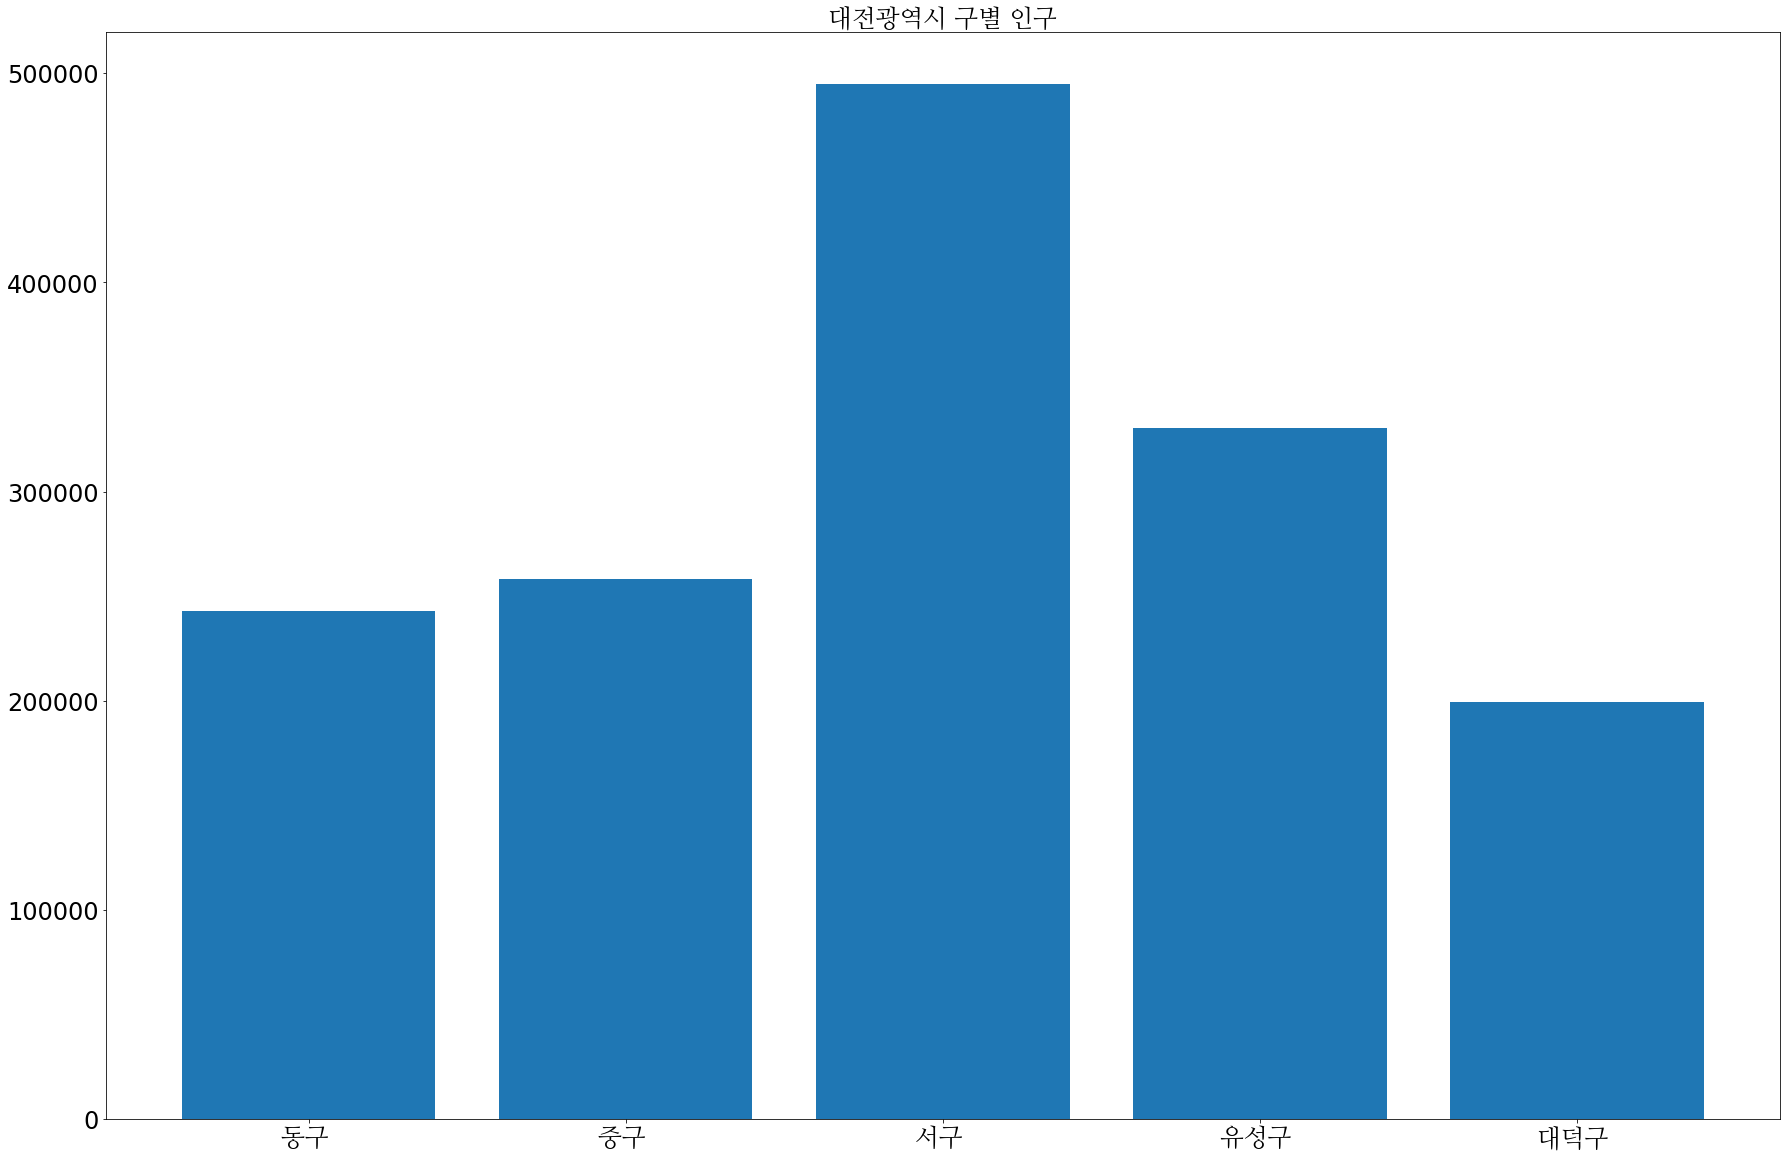

In [13]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

daejeon_pop = [] #Population 데이터를 저장할 리스트 생성
daejeon_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '대전광역시': #대전광역시 해당하는 값이라면
            daejeon_pop.append(float(row[3])) # daejeon_pop 리스트에 Population 값 추가
            daejeon_city.append(str(row[2])) # daejeon_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(daejeon_city, daejeon_pop)
plt.xticks(daejeon_city, fontproperties=fontprop)
plt.title('대전광역시 구별 인구', fontproperties=fontprop)

plt.show()

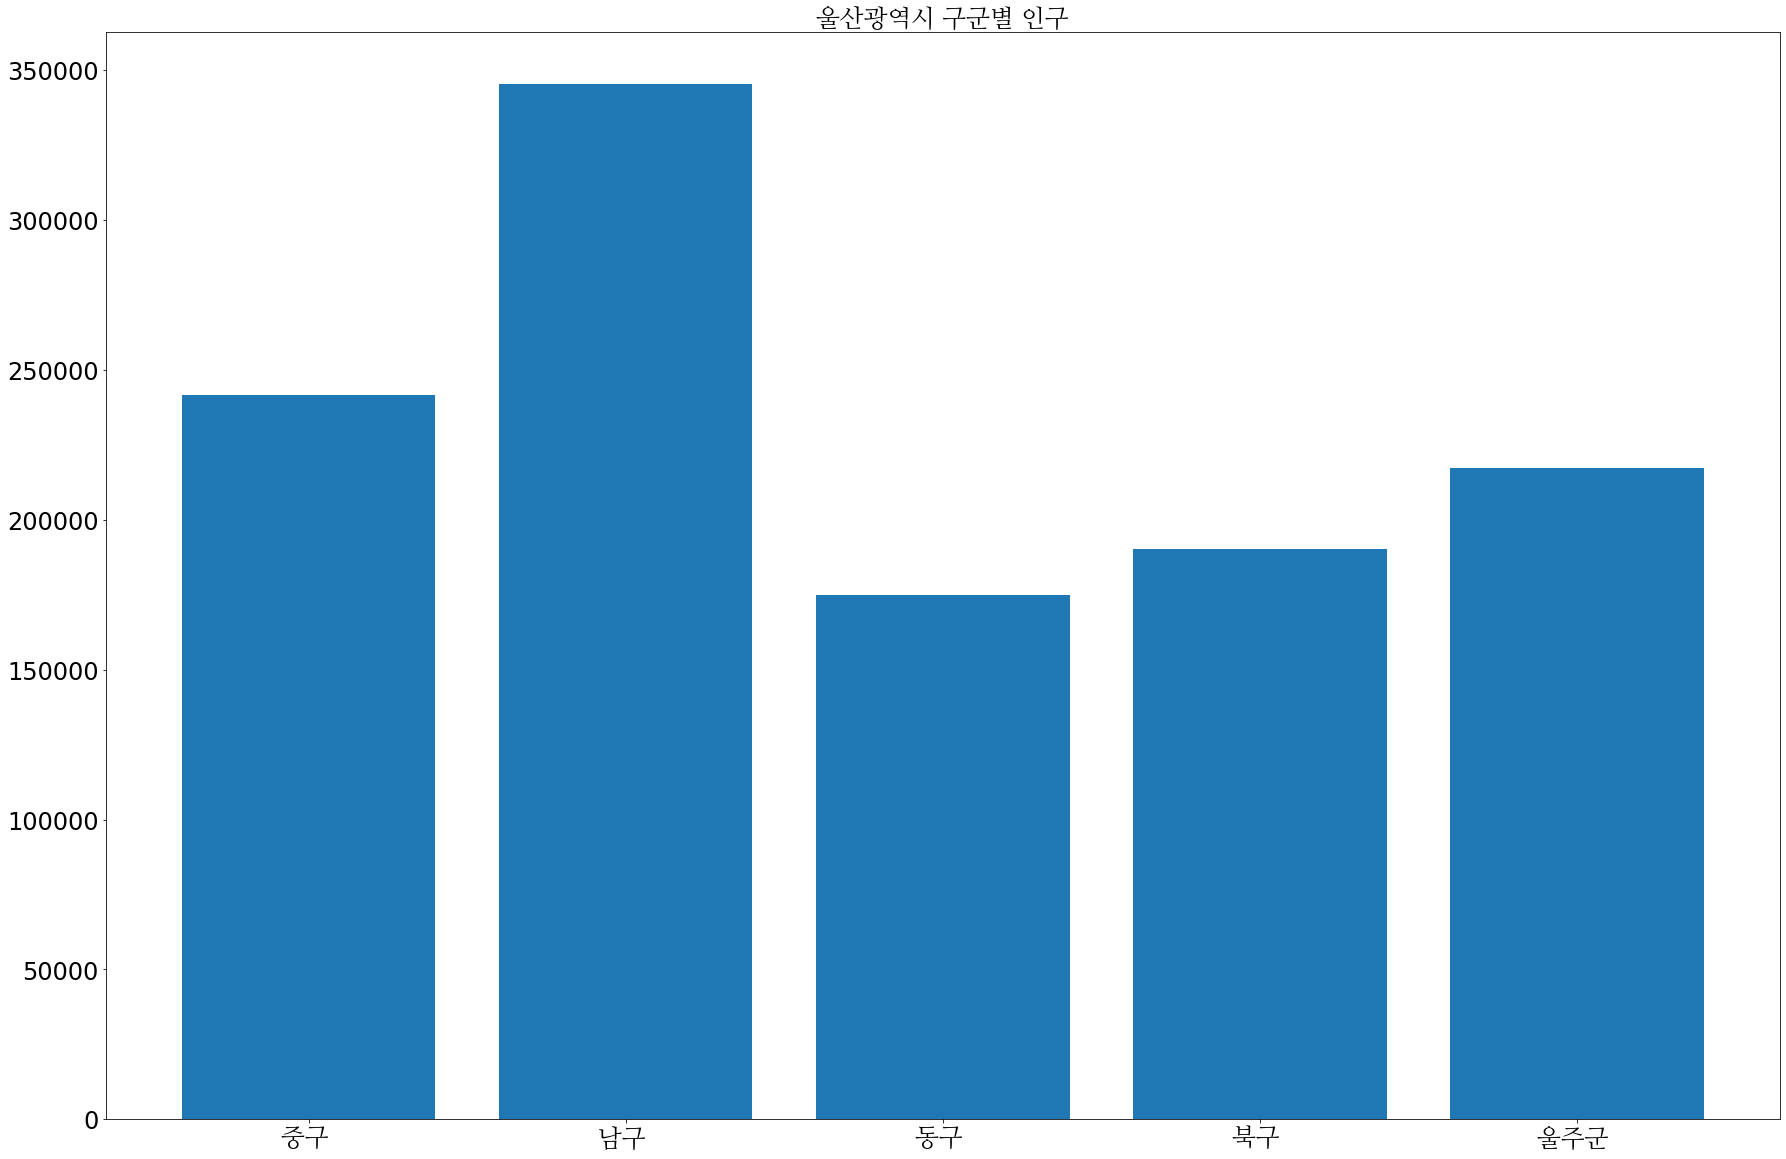

In [14]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

ulsan_pop = [] #Population 데이터를 저장할 리스트 생성
ulsan_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '울산광역시': #울산광역시 해당하는 값이라면
            ulsan_pop.append(float(row[3])) # ulsan_pop 리스트에 Population 값 추가
            ulsan_city.append(str(row[2])) # ulsan_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(30, 20))          
plt.bar(ulsan_city, ulsan_pop)
plt.xticks(ulsan_city, fontproperties=fontprop)
plt.title('울산광역시 구군별 인구', fontproperties=fontprop)

plt.show()

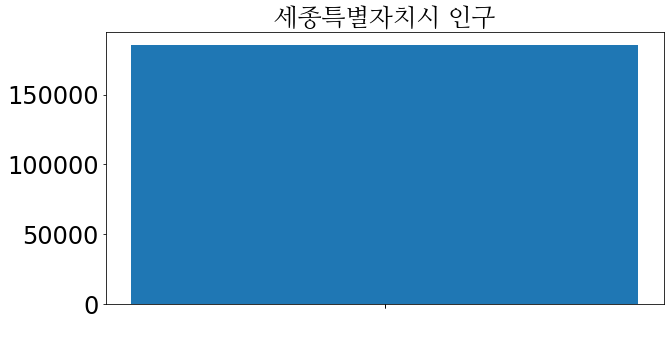

In [15]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

sejong_pop = [] #Population 데이터를 저장할 리스트 생성
sejong_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[1] == '세종특별자치시': #세종특별자치시 해당하는 값이라면
        sejong_pop.append(float(row[3])) # sejong_pop 리스트에 Population 값 추가
        sejong_city.append(str(row[2])) # sejong_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=25)
            
plt.figure(figsize=(10, 5))          
plt.bar(sejong_city, sejong_pop)
plt.xticks(sejong_city, fontproperties=fontprop)
plt.title('세종특별자치시 인구', fontproperties=fontprop)

plt.show()


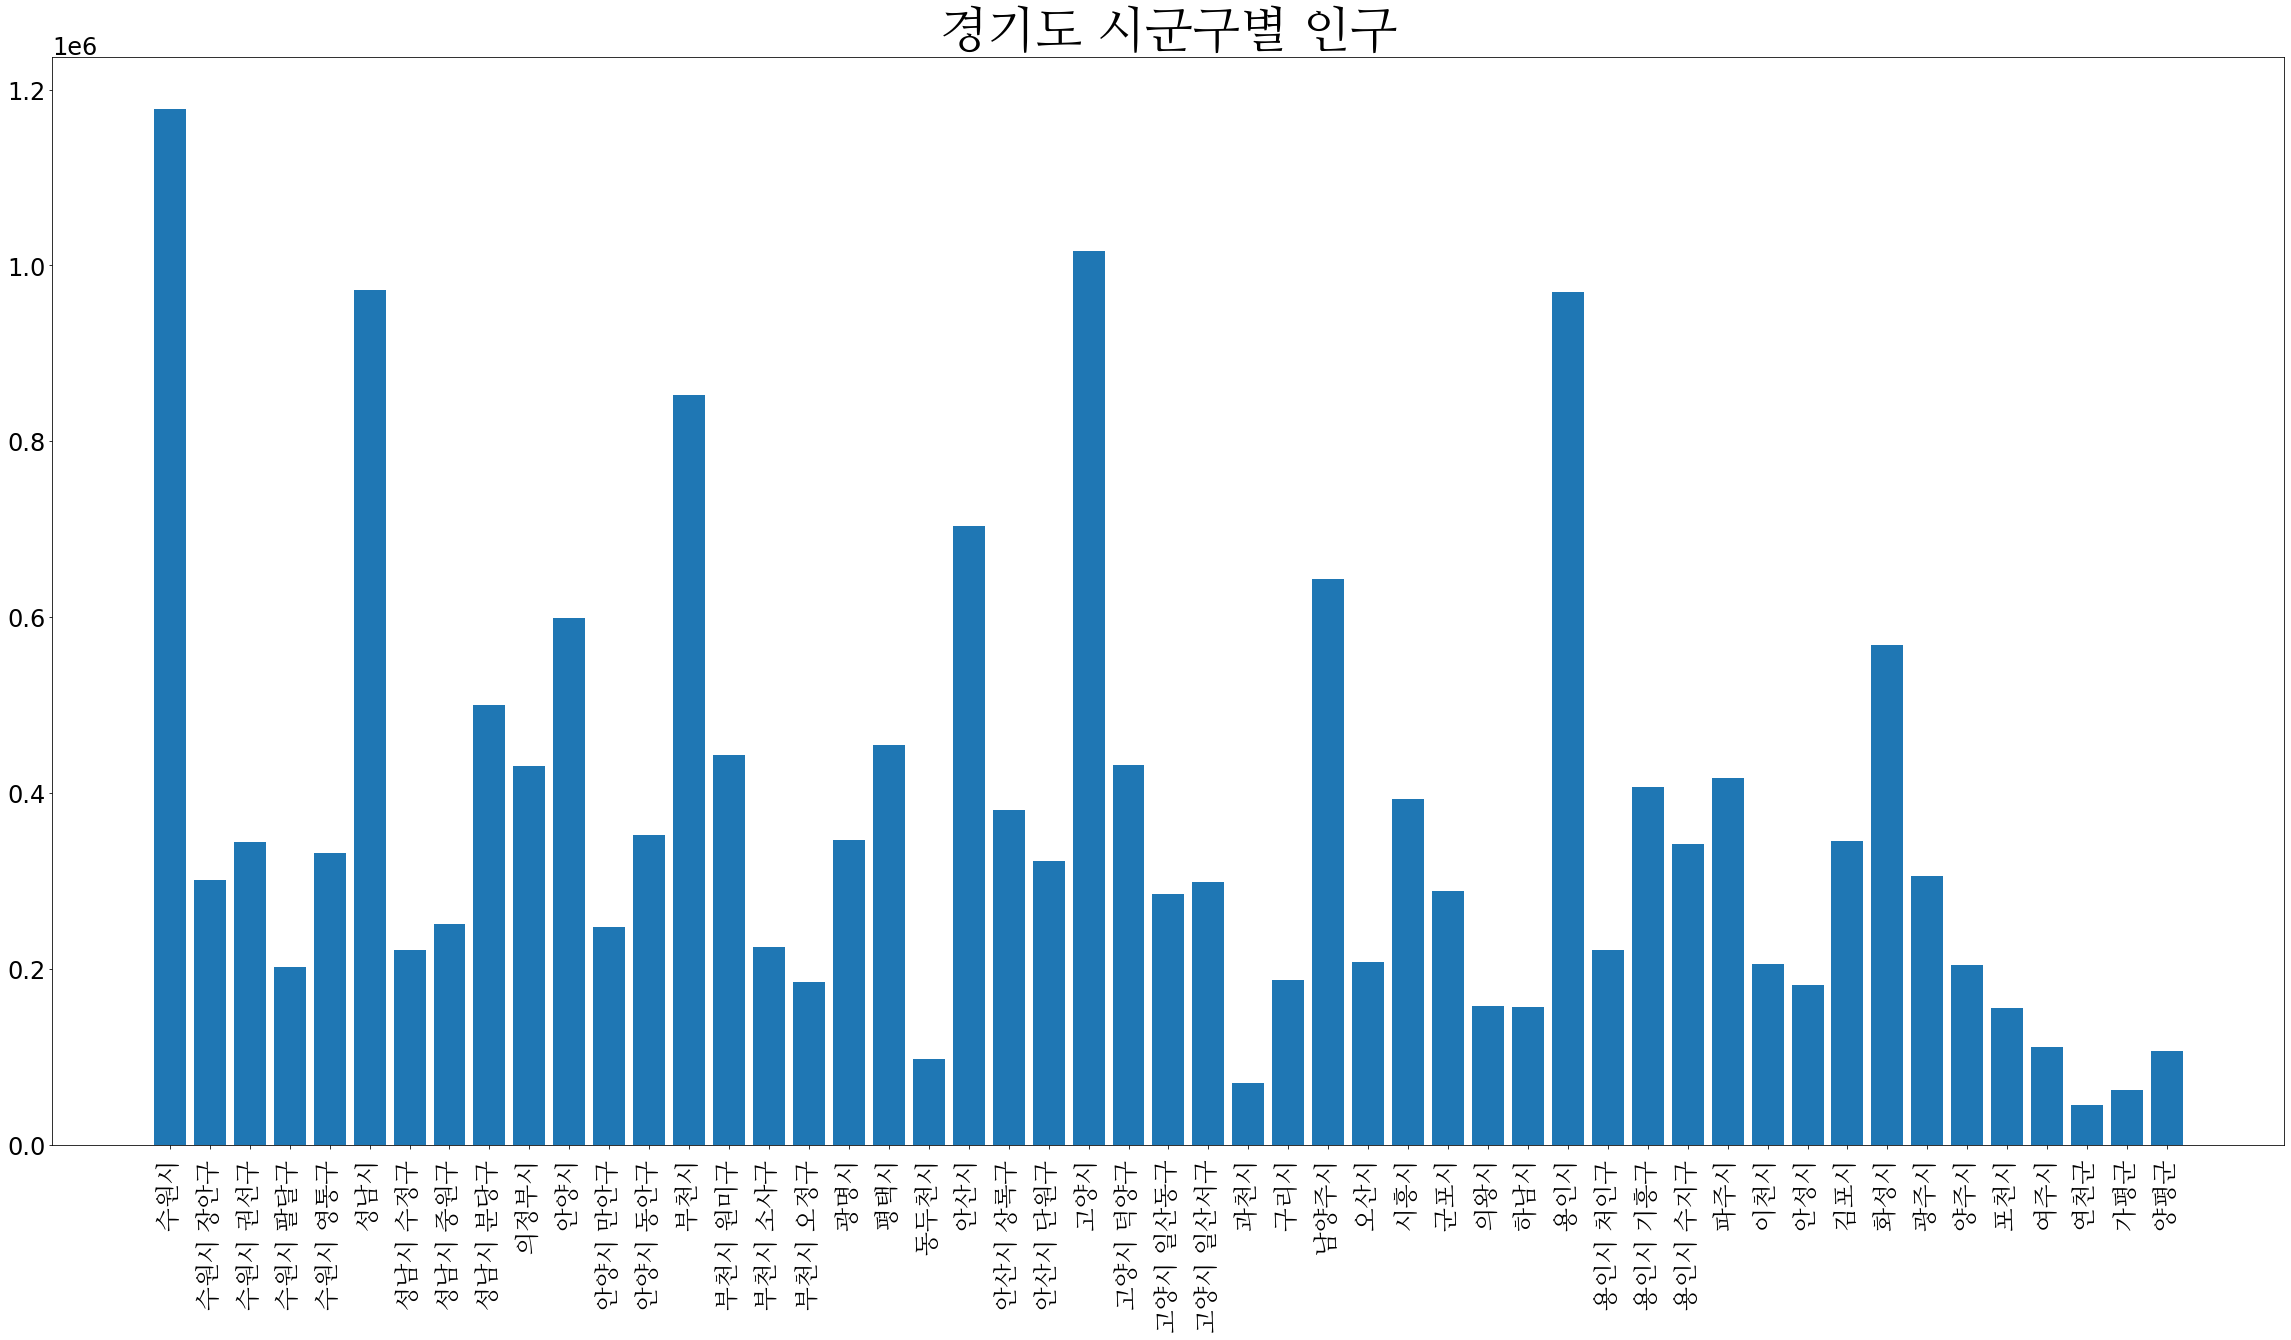

In [16]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

gg_pop = [] #Population 데이터를 저장할 리스트 생성
gg_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '경기도': #경기도 해당하는 값이라면
            gg_pop.append(float(row[3])) # gg_pop 리스트에 Population 값 추가
            gg_city.append(str(row[2])) # gg_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=50)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(gg_city, gg_pop)
plt.xticks(gg_city, fontproperties=fontprop1 , fontsize=25, rotation=90)
plt.title('경기도 시군구별 인구', fontproperties=fontprop)

plt.show()

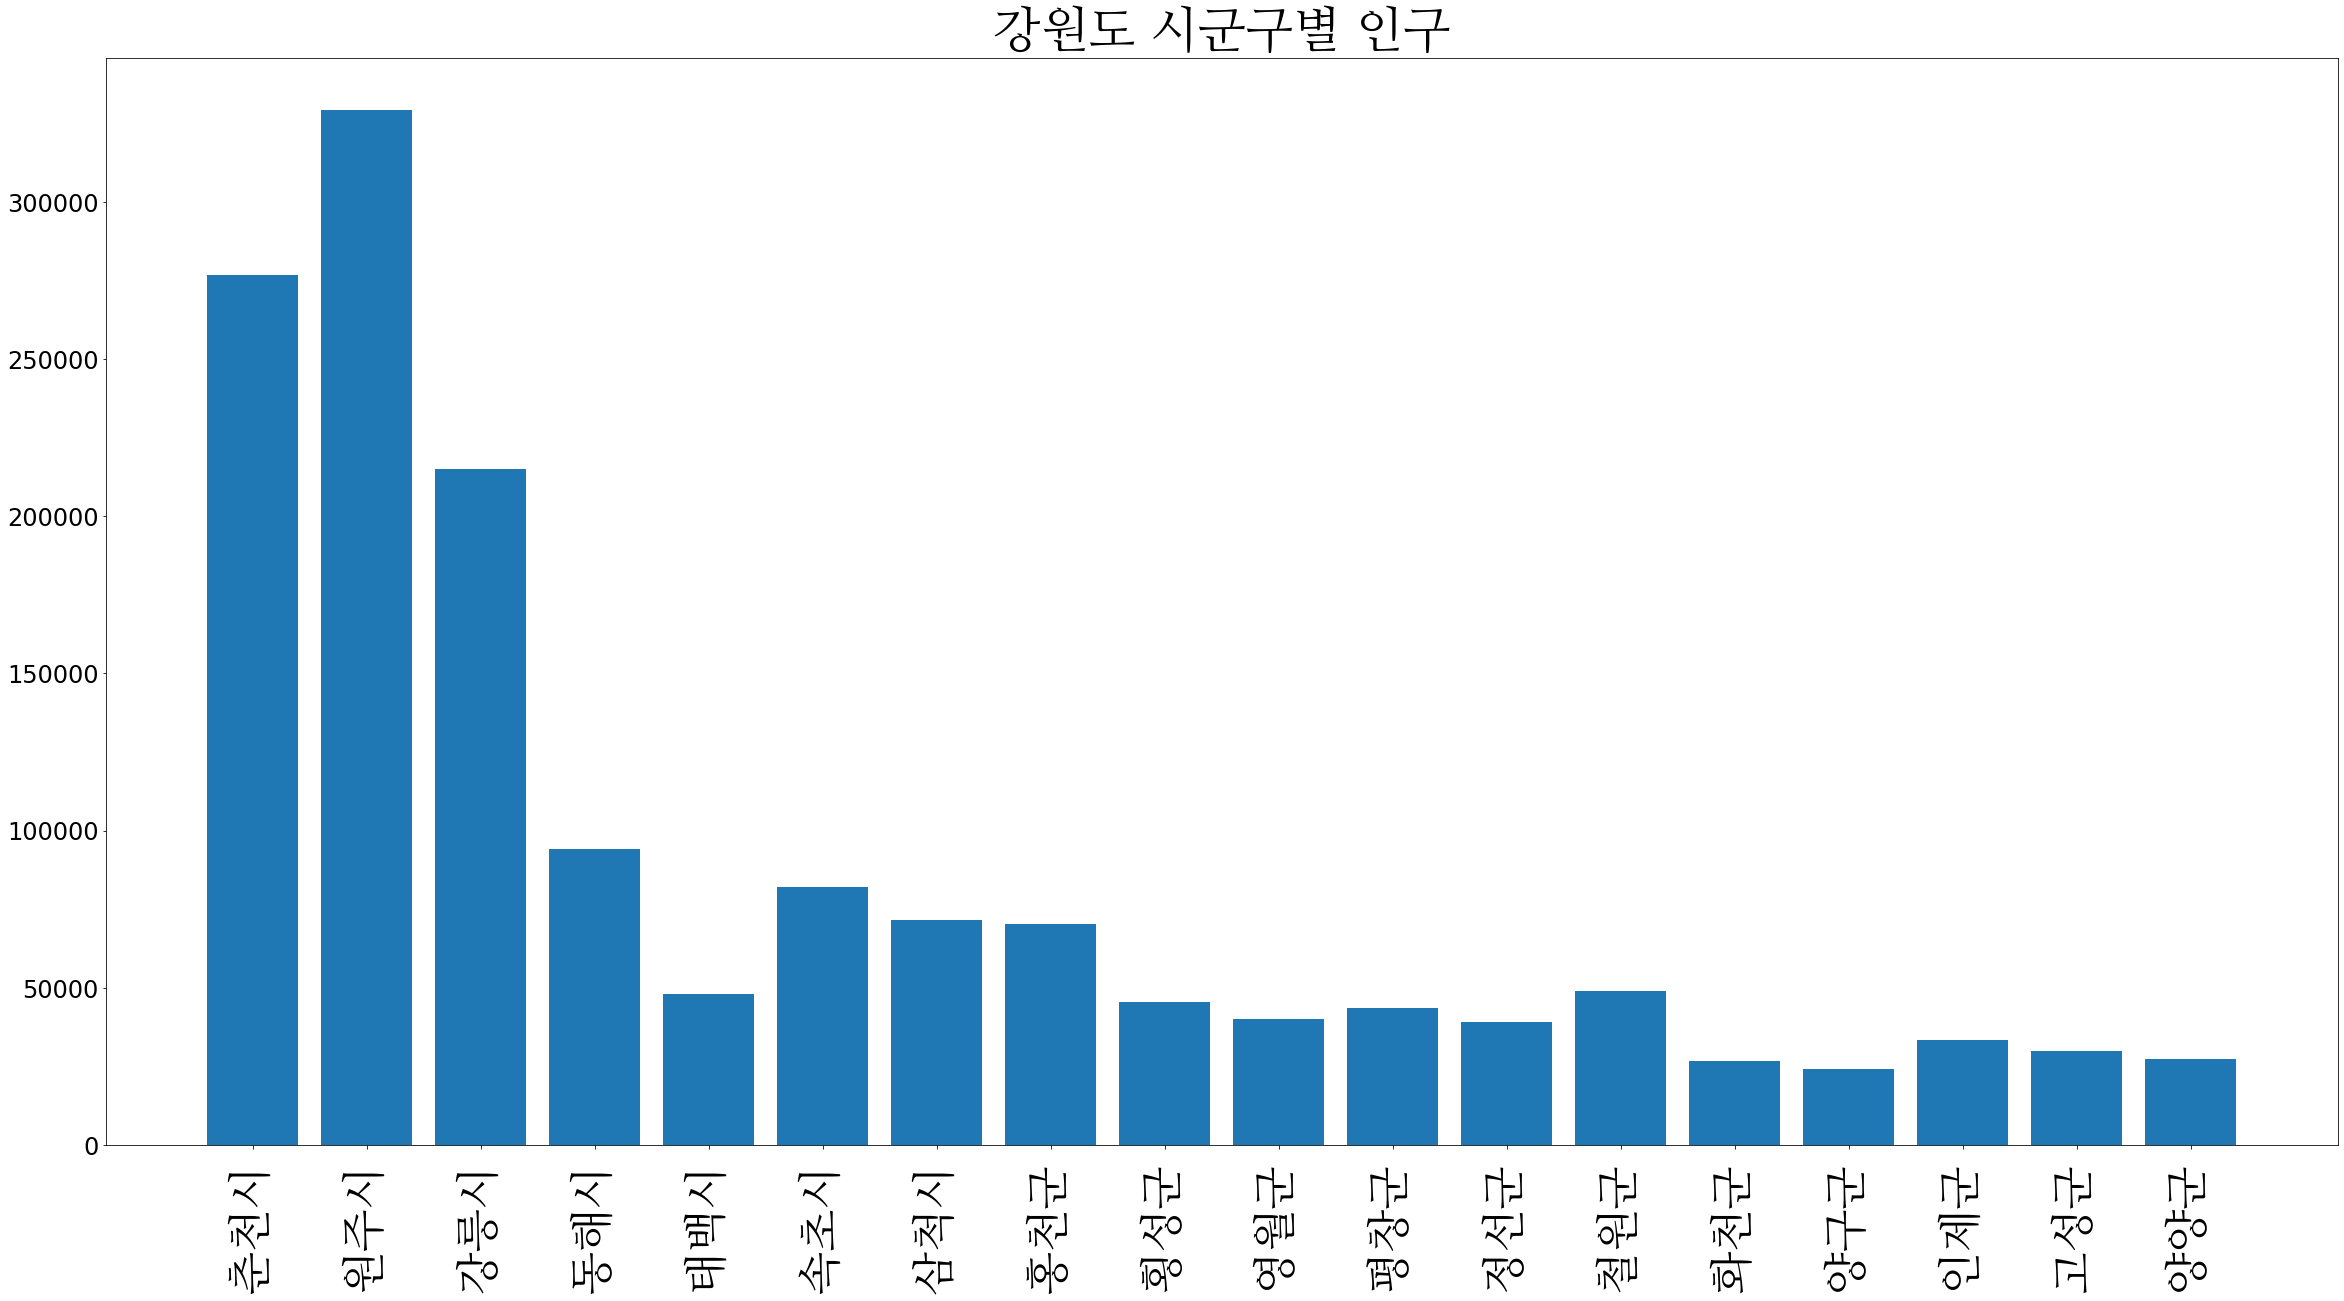

In [17]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

gw_pop = [] #Population 데이터를 저장할 리스트 생성
gw_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '강원도': #강원도 해당하는 값이라면
            gw_pop.append(float(row[3])) # gw_pop 리스트에 Population 값 추가
            gw_city.append(str(row[2])) # gw_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(gw_city, gw_pop)
plt.xticks(gw_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('강원도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

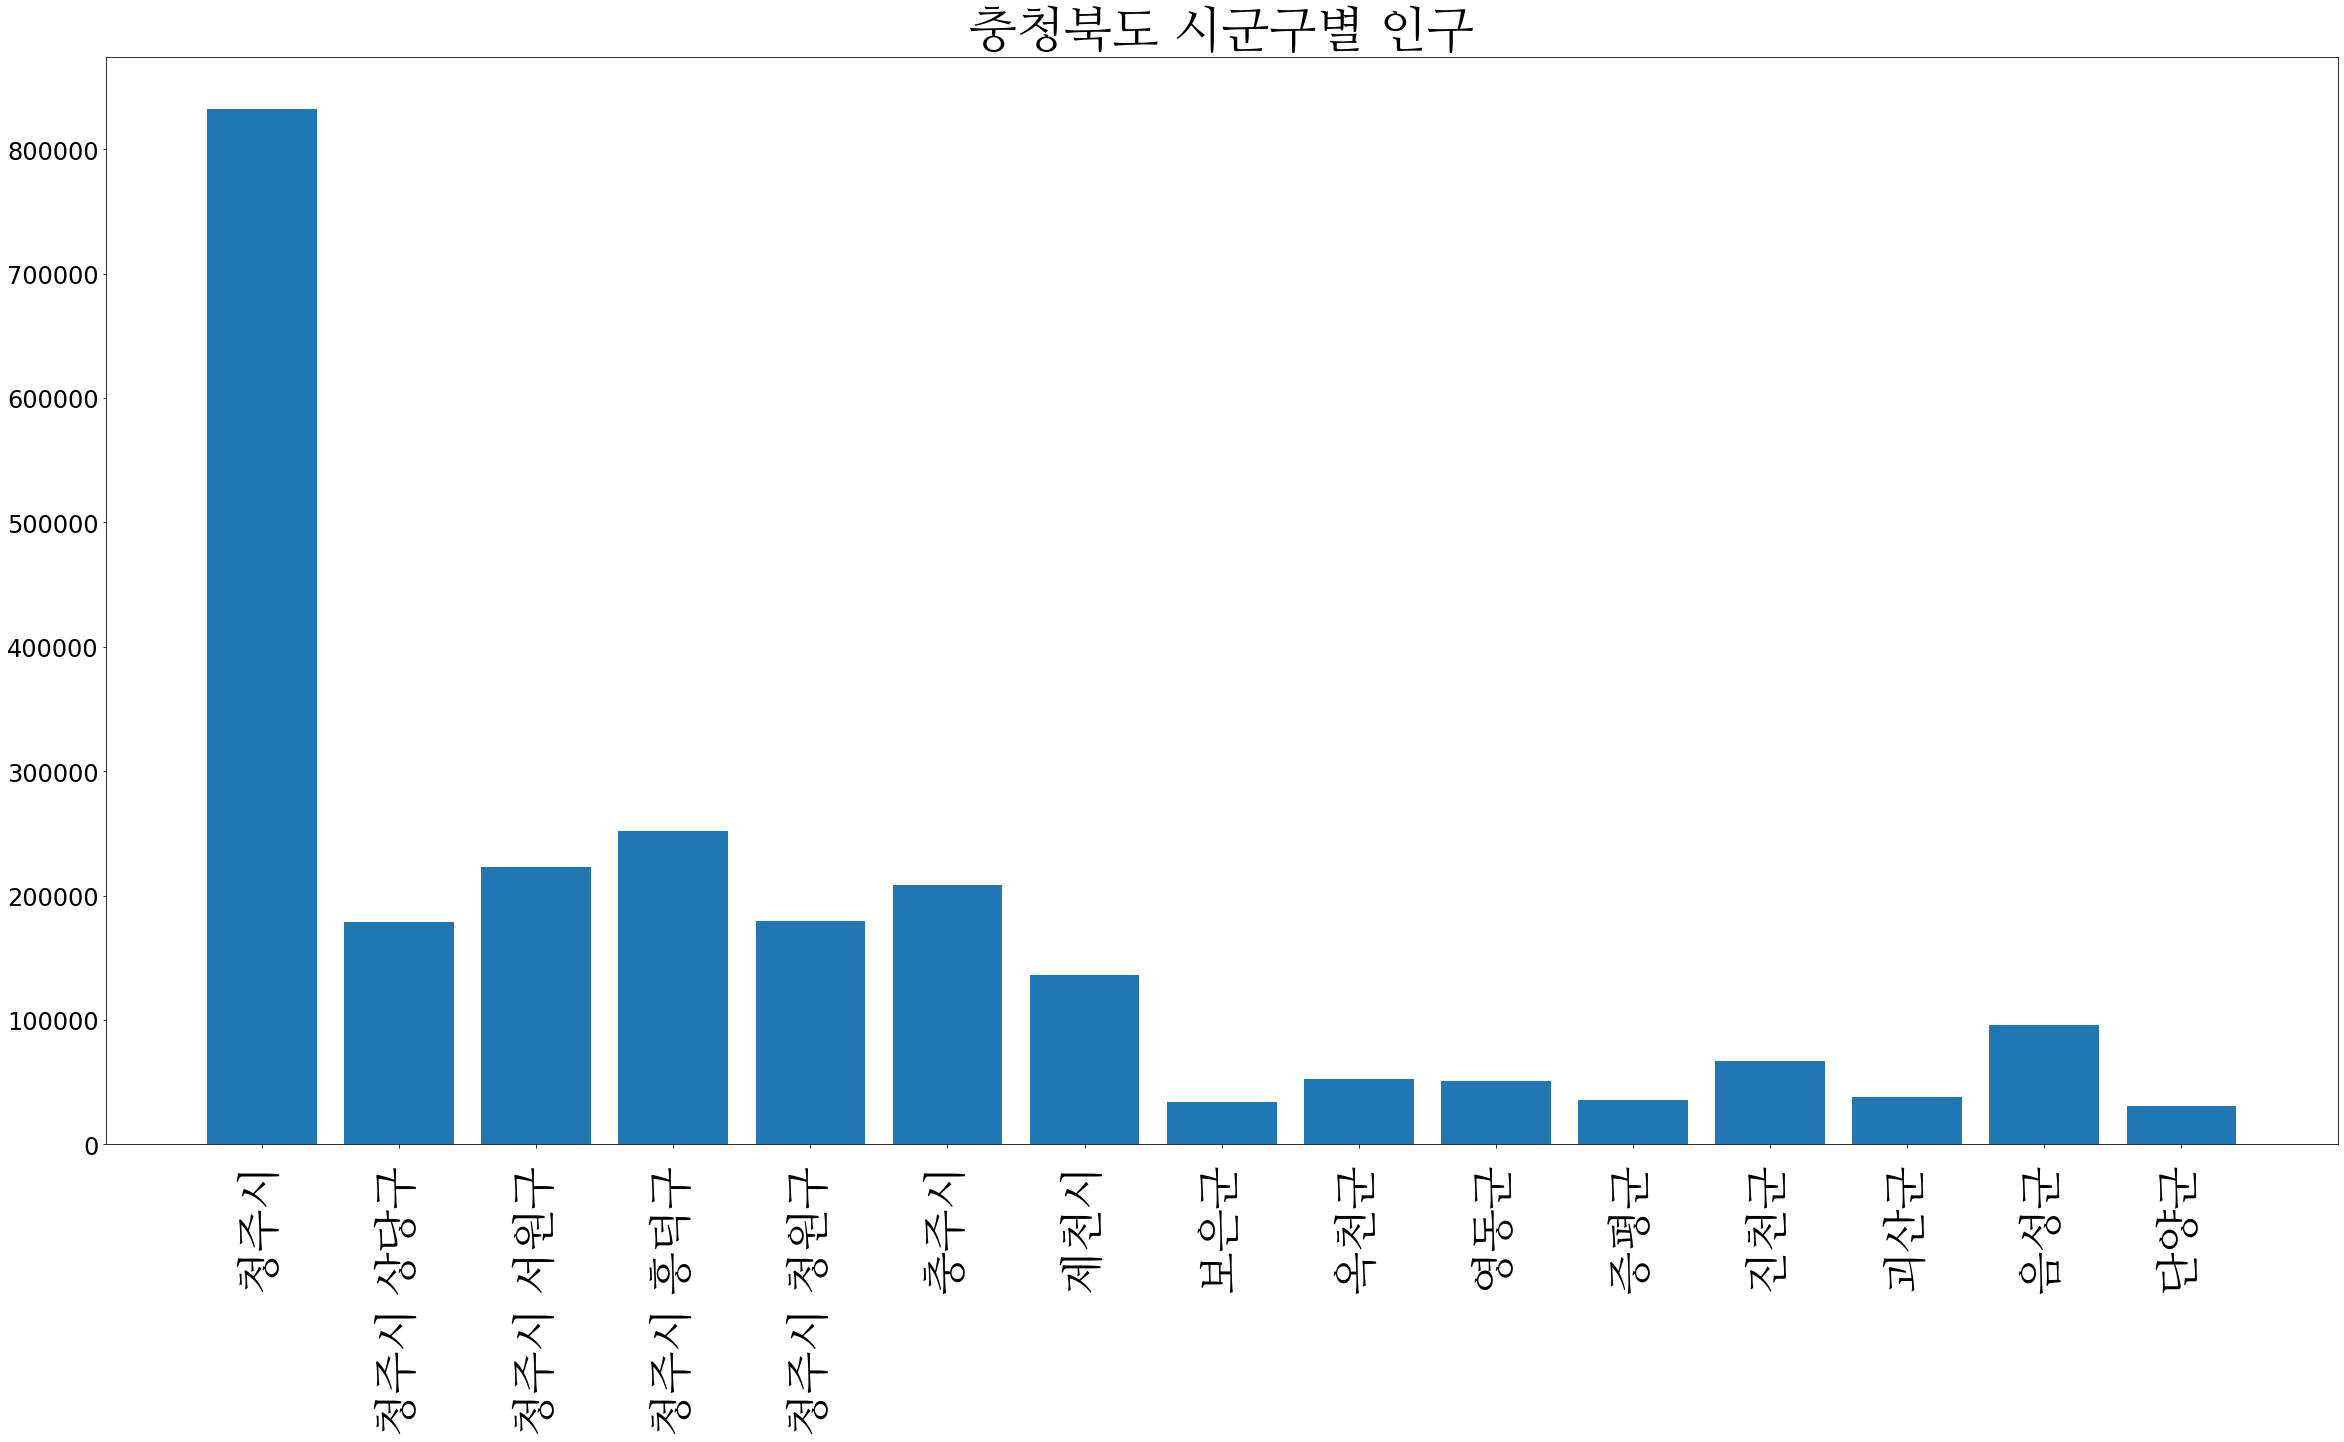

In [18]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

cb_pop = [] #Population 데이터를 저장할 리스트 생성
cb_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '충청북도': #충청북도 해당하는 값이라면
            cb_pop.append(float(row[3])) # cb_pop 리스트에 Population 값 추가
            cb_city.append(str(row[2])) # cb_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(cb_city, cb_pop)
plt.xticks(cb_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('충청북도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

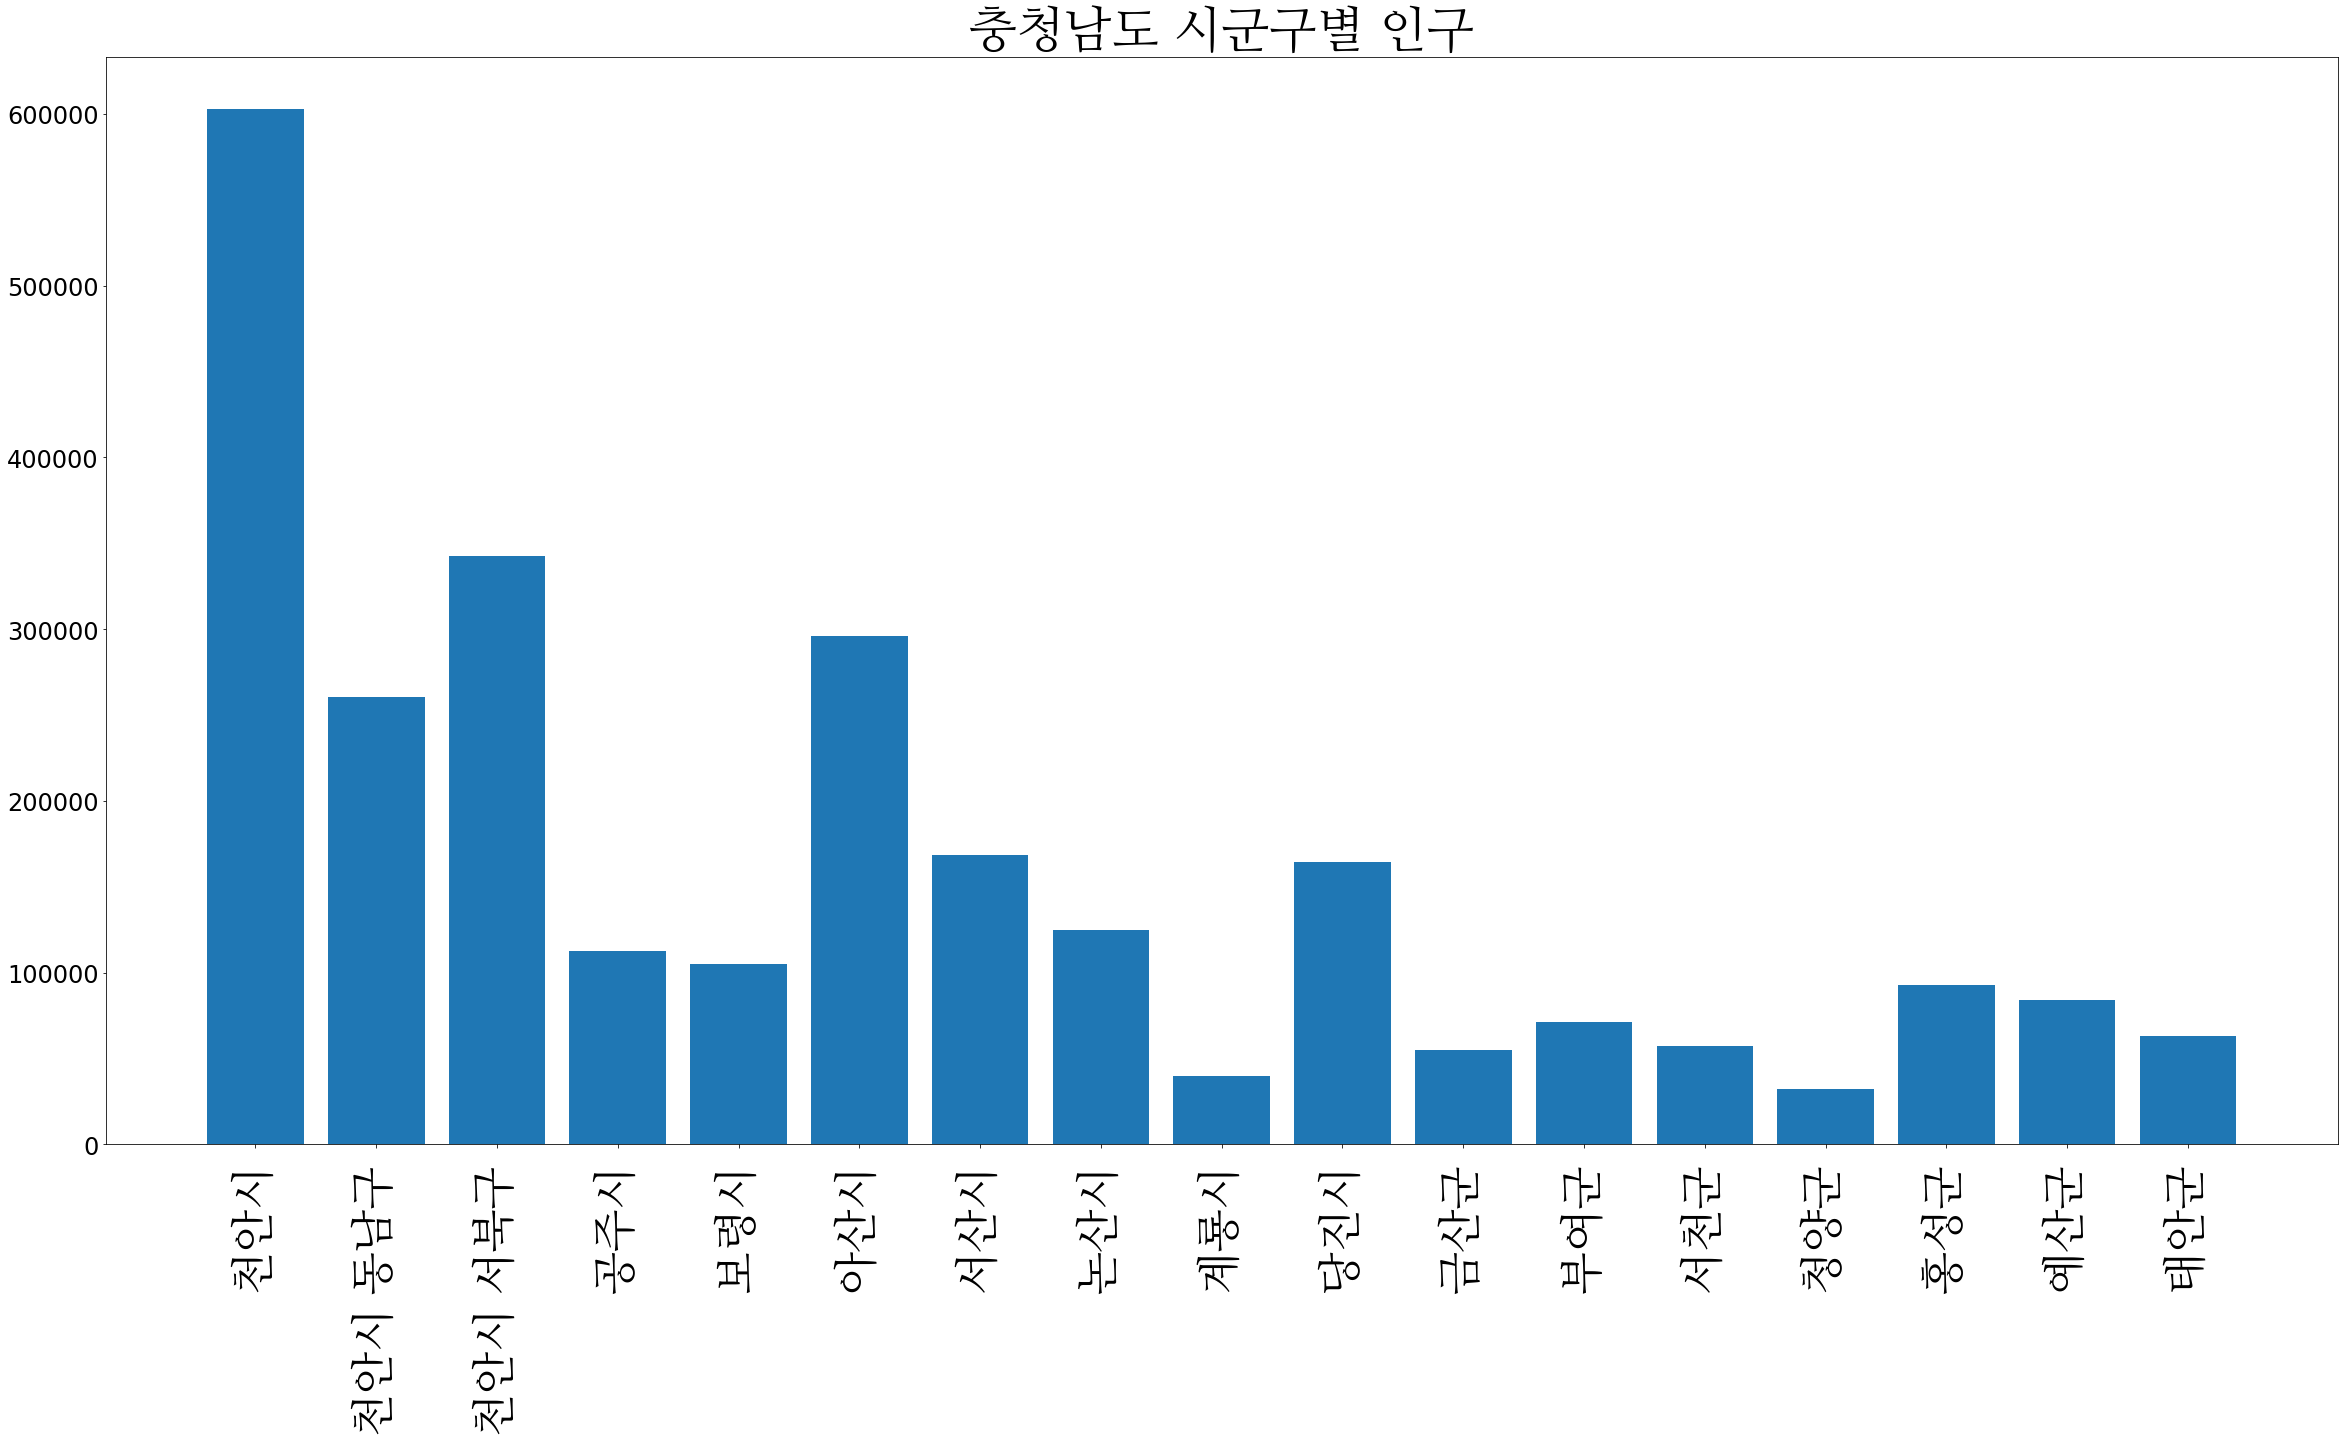

In [19]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

cn_pop = [] #Population 데이터를 저장할 리스트 생성
cn_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '충청남도': #충청남도 해당하는 값이라면
            cn_pop.append(float(row[3])) # cn_pop 리스트에 Population 값 추가
            cn_city.append(str(row[2])) # cn_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(cn_city, cn_pop)
plt.xticks(cn_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('충청남도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

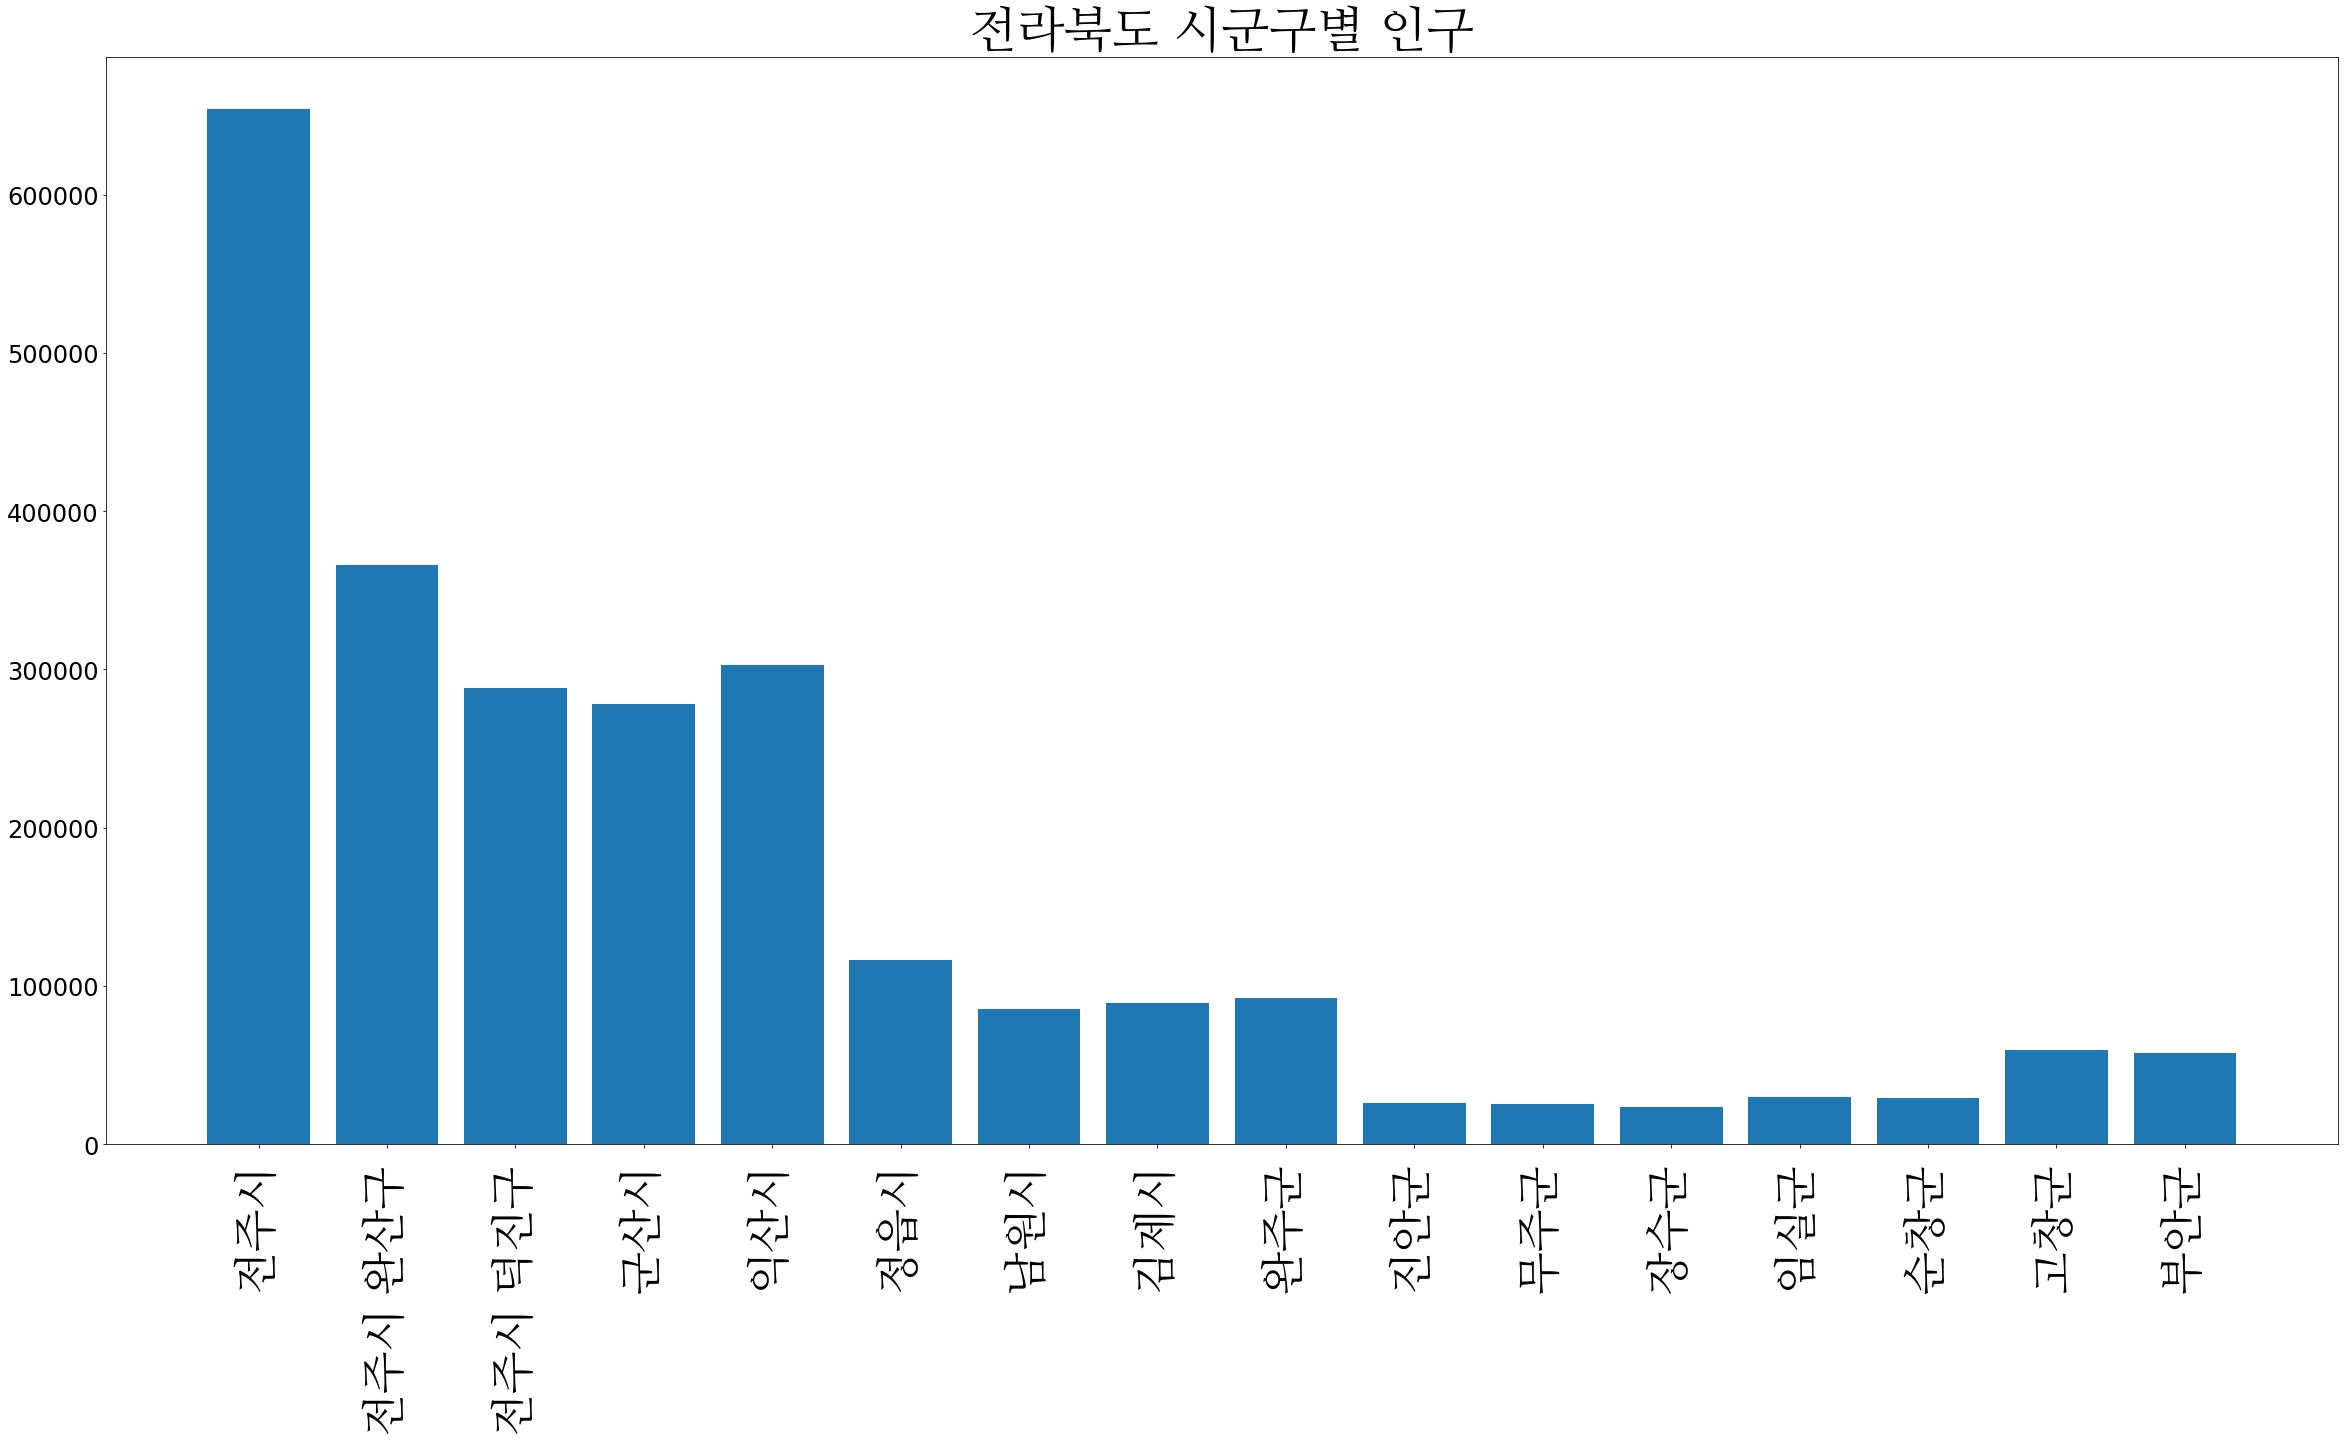

In [20]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

jb_pop = [] #Population 데이터를 저장할 리스트 생성
jb_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '전라북도': #전라북도 해당하는 값이라면
            jb_pop.append(float(row[3])) # jb_pop 리스트에 Population 값 추가
            jb_city.append(str(row[2])) # jb_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(jb_city, jb_pop)
plt.xticks(jb_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('전라북도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

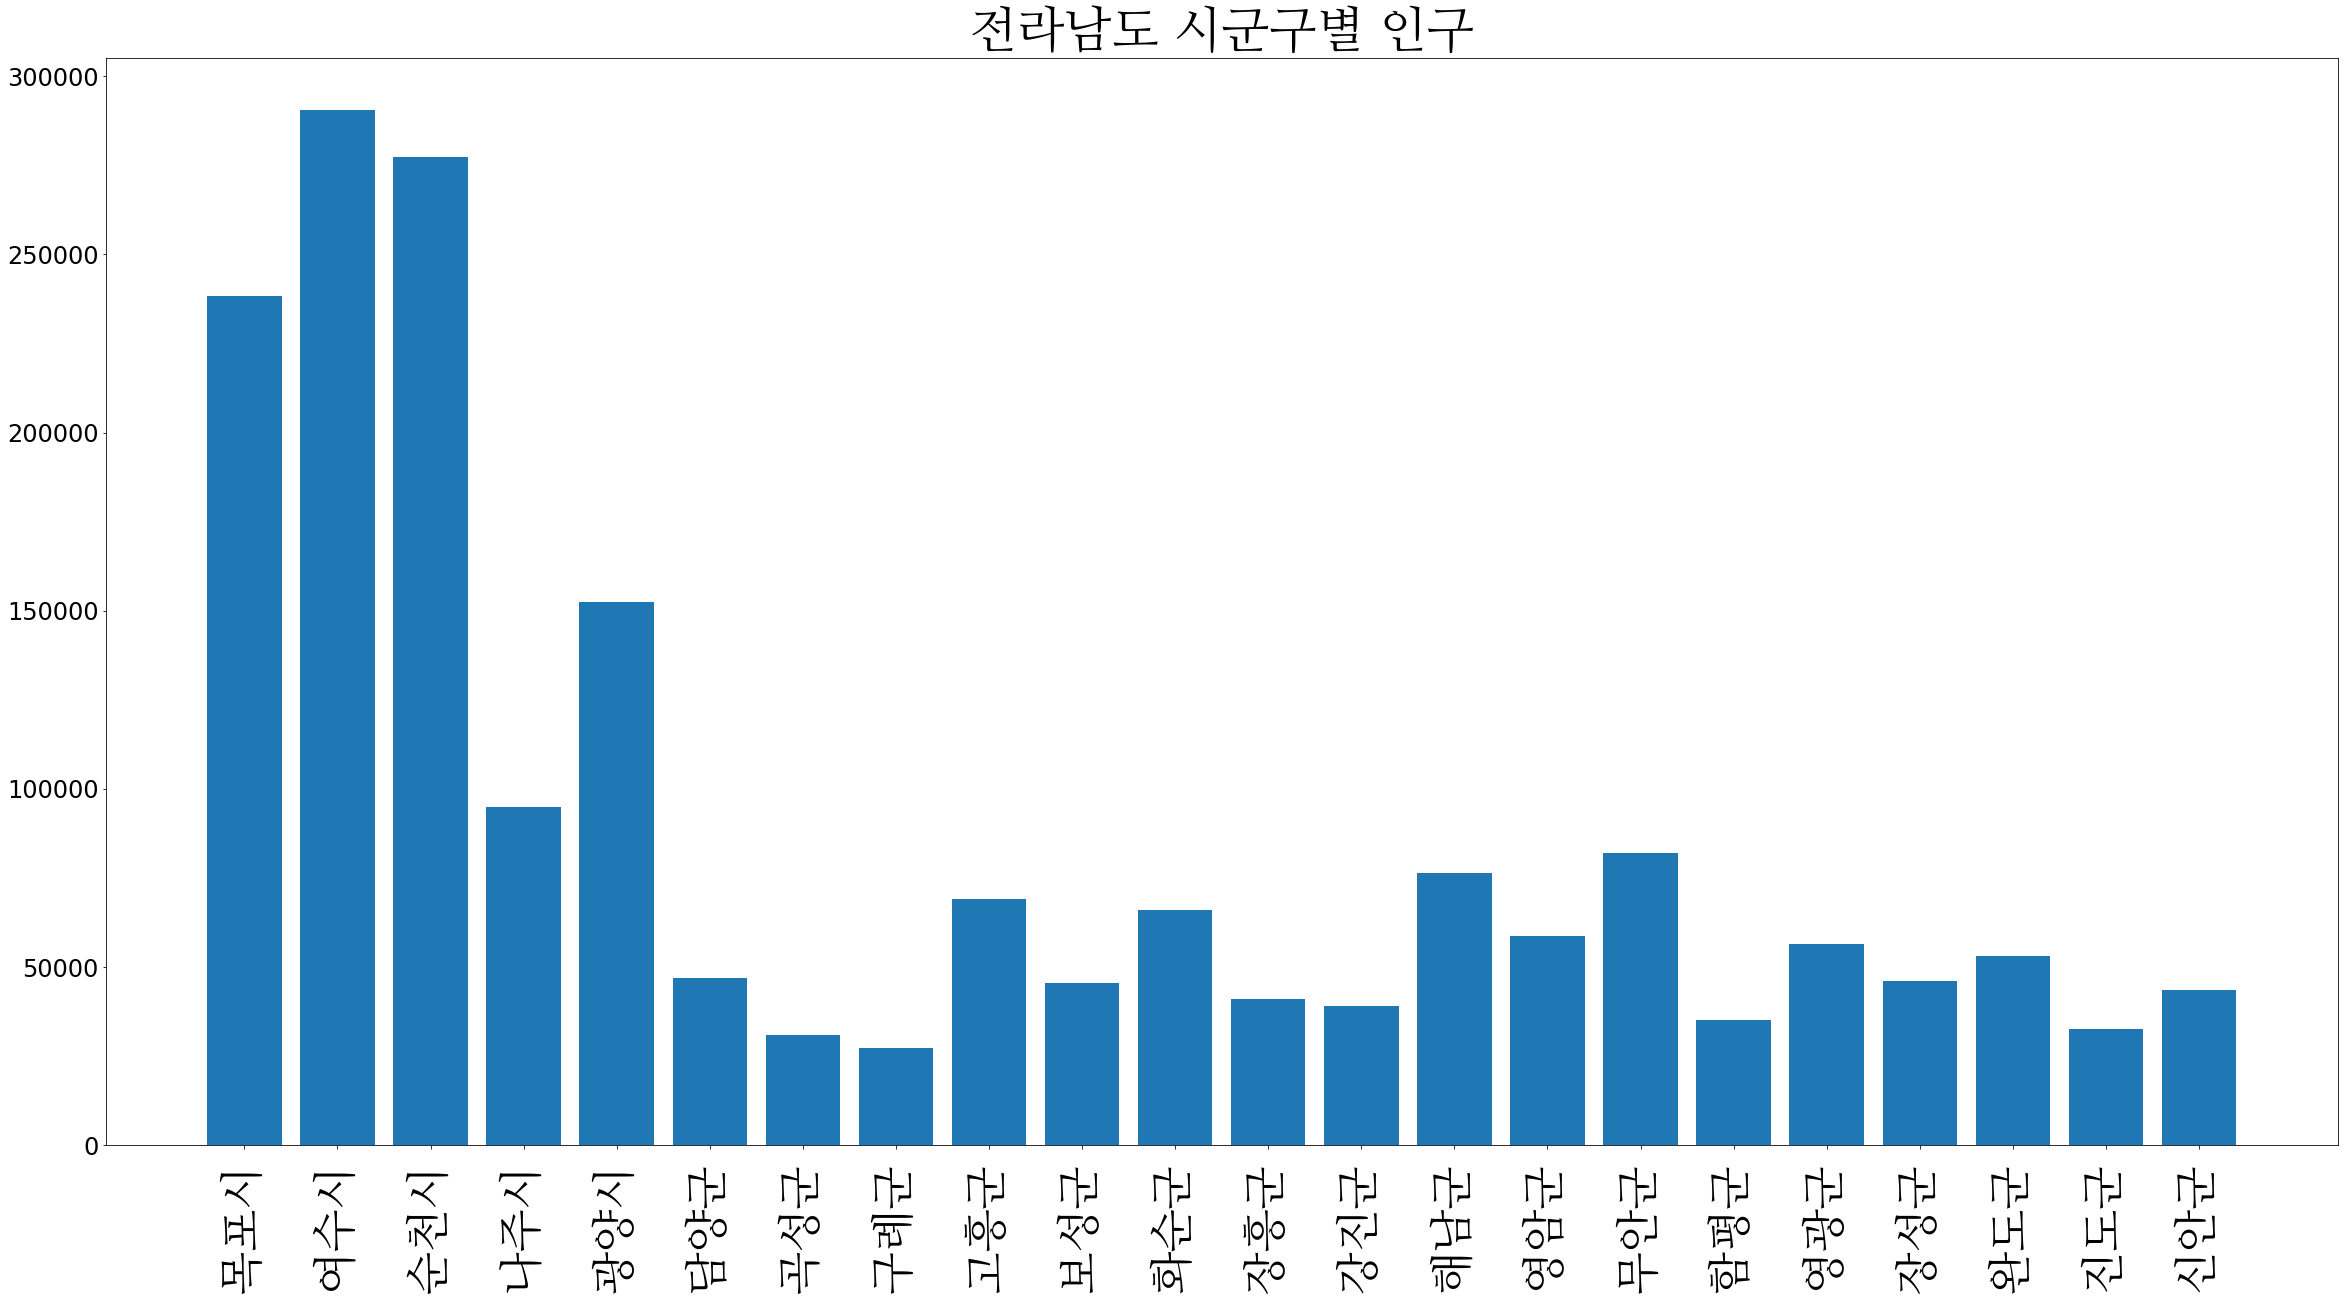

In [21]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

jn_pop = [] #Population 데이터를 저장할 리스트 생성
jn_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '전라남도': #전라남도 해당하는 값이라면
            jn_pop.append(float(row[3])) # jn_pop 리스트에 Population 값 추가
            jn_city.append(str(row[2])) # jn_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(jn_city, jn_pop)
plt.xticks(jn_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('전라남도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

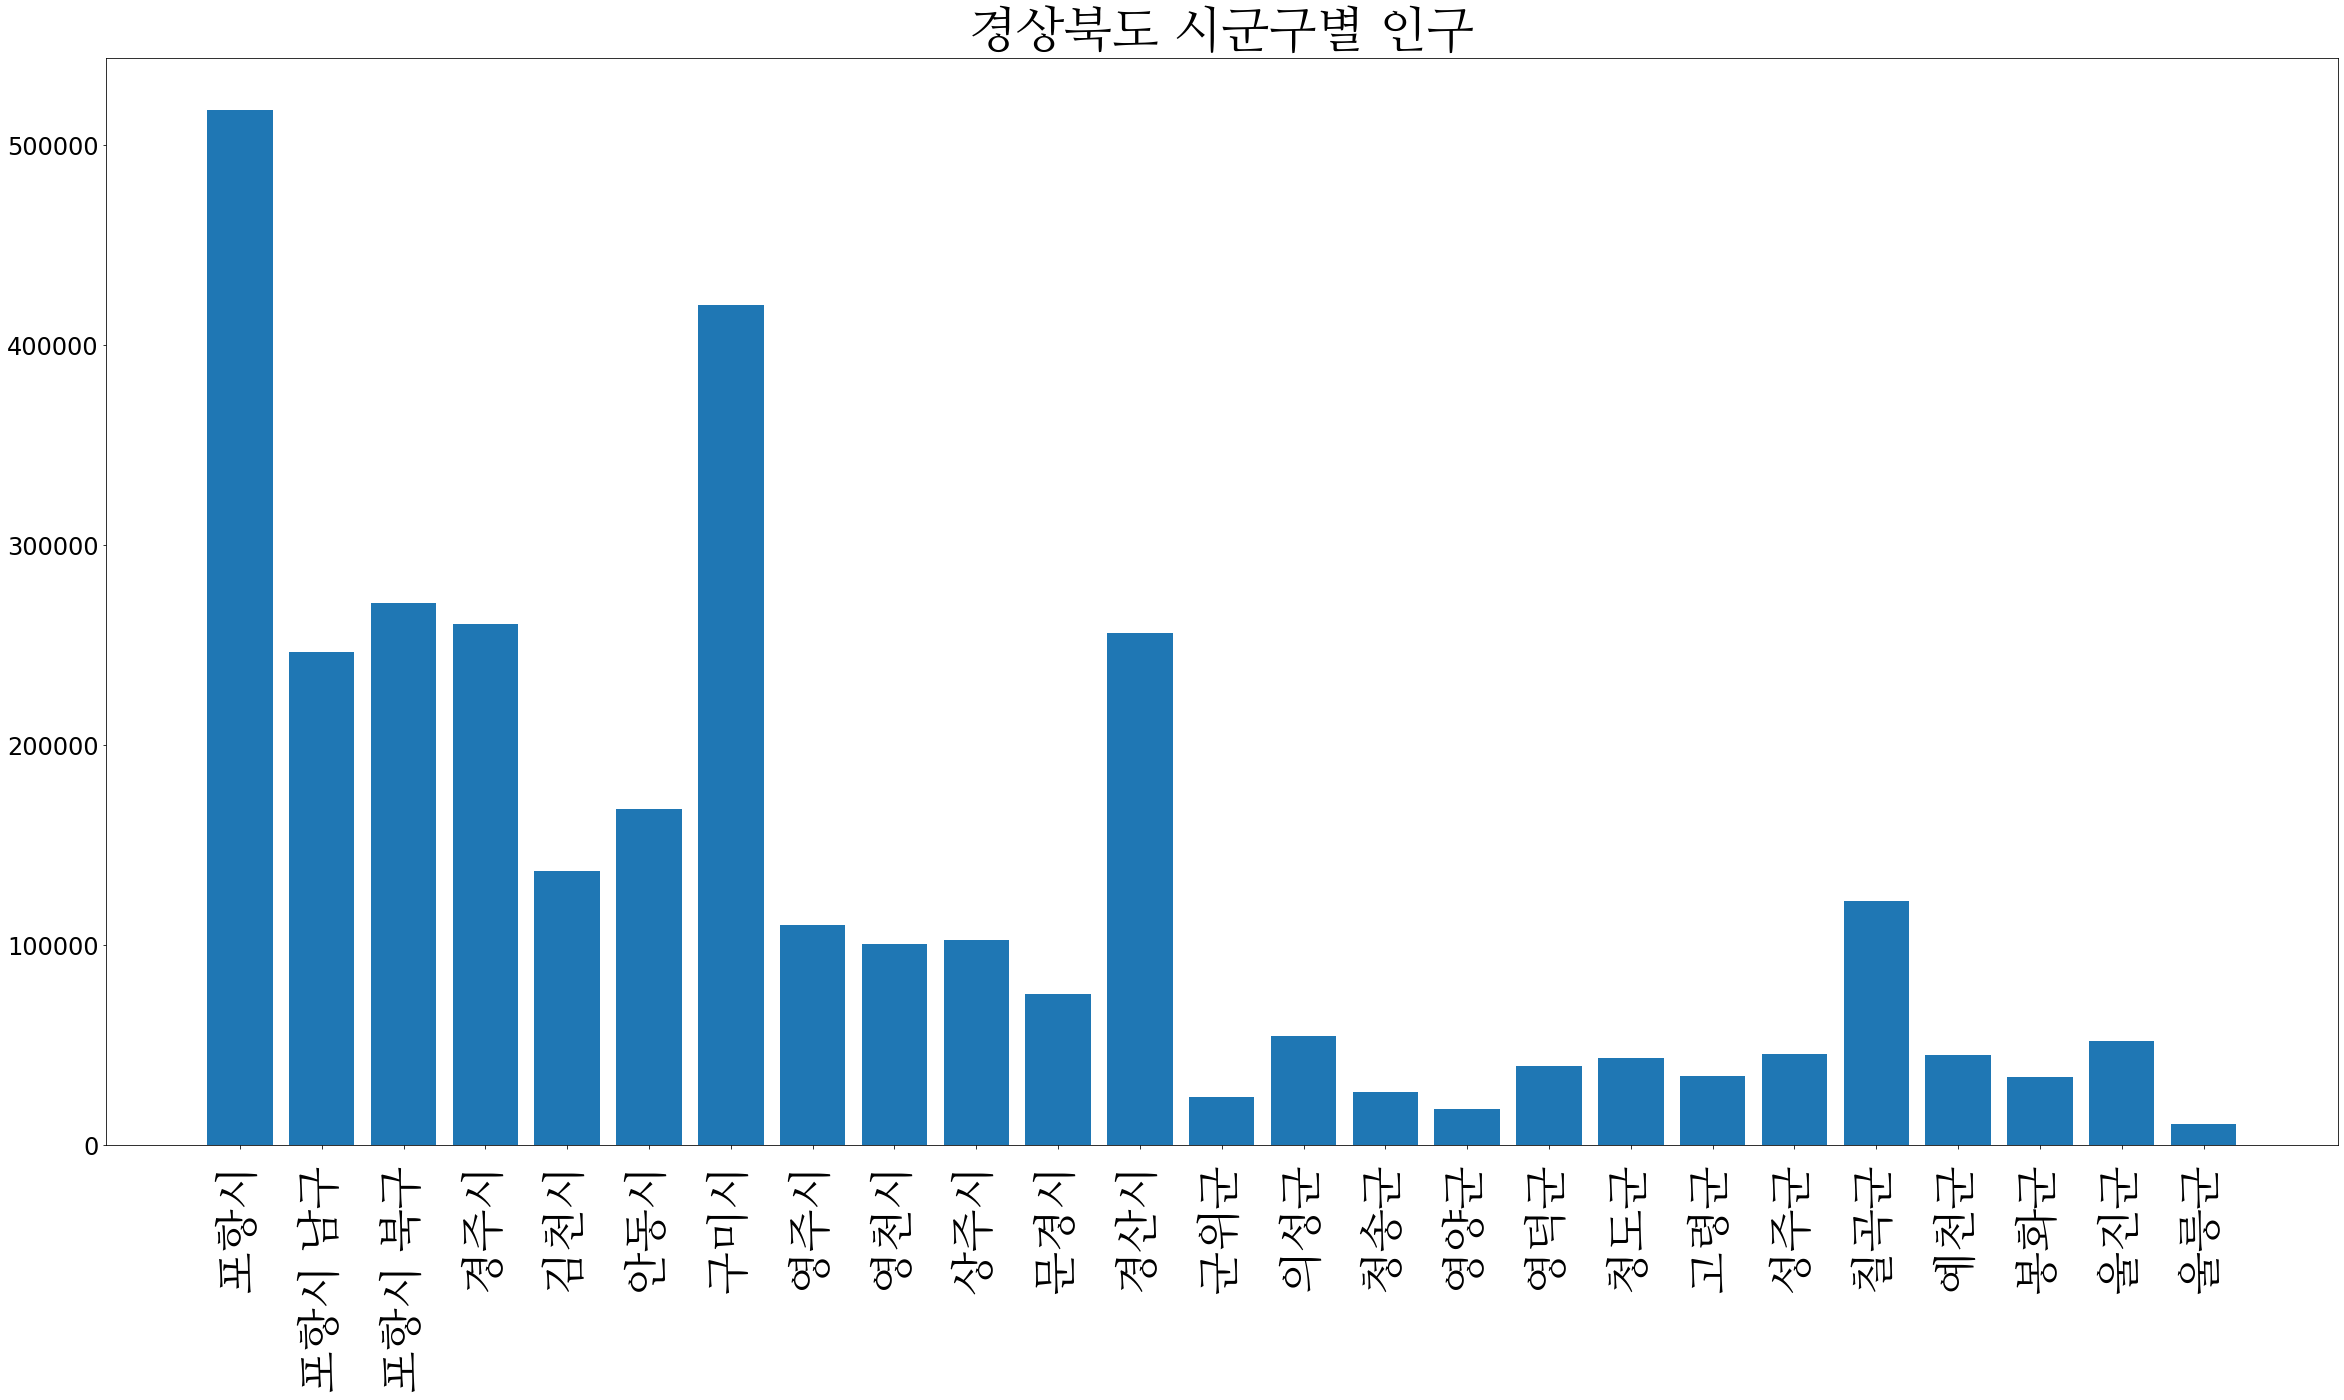

In [22]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

gb_pop = [] #Population 데이터를 저장할 리스트 생성
gb_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '경상북도': #경상북도 해당하는 값이라면
            gb_pop.append(float(row[3])) # gb_pop 리스트에 Population 값 추가
            gb_city.append(str(row[2])) # gb_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(gb_city, gb_pop)
plt.xticks(gb_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('경상북도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

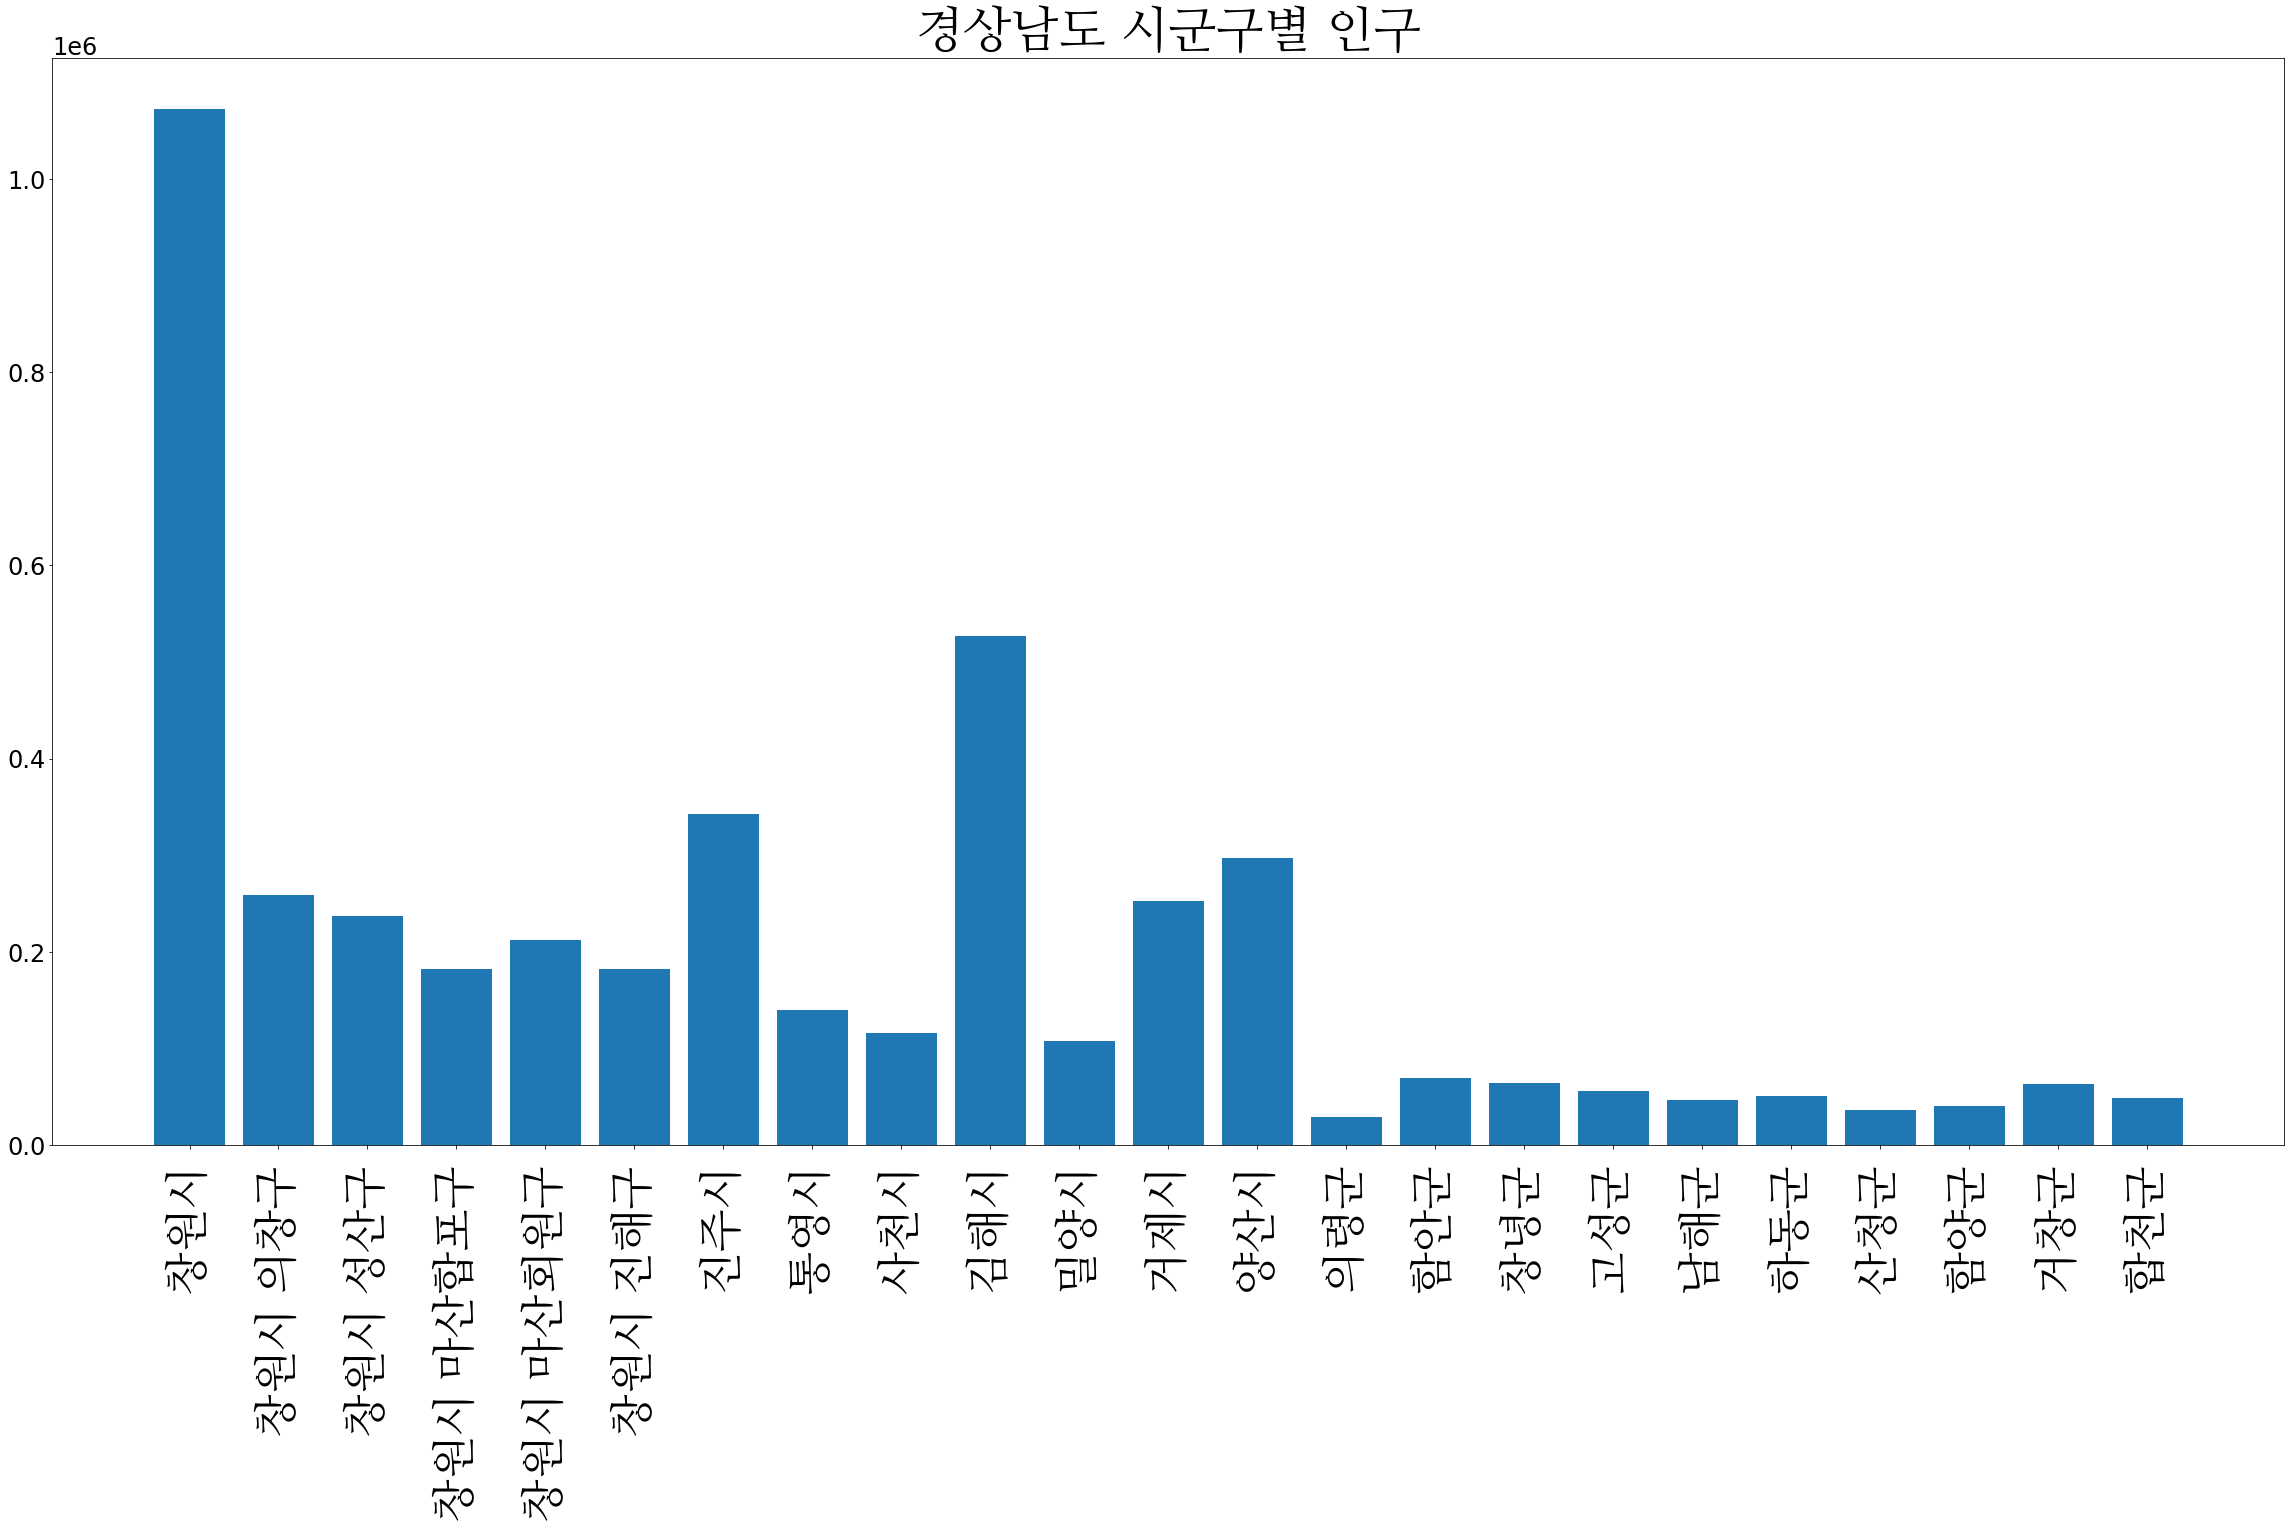

In [23]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

gn_pop = [] #Population 데이터를 저장할 리스트 생성
gn_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '경상남도': #경상남도 해당하는 값이라면
            gn_pop.append(float(row[3])) # gn_pop 리스트에 Population 값 추가
            gn_city.append(str(row[2])) # gn_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(gn_city, gn_pop)
plt.xticks(gn_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('경상남도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()

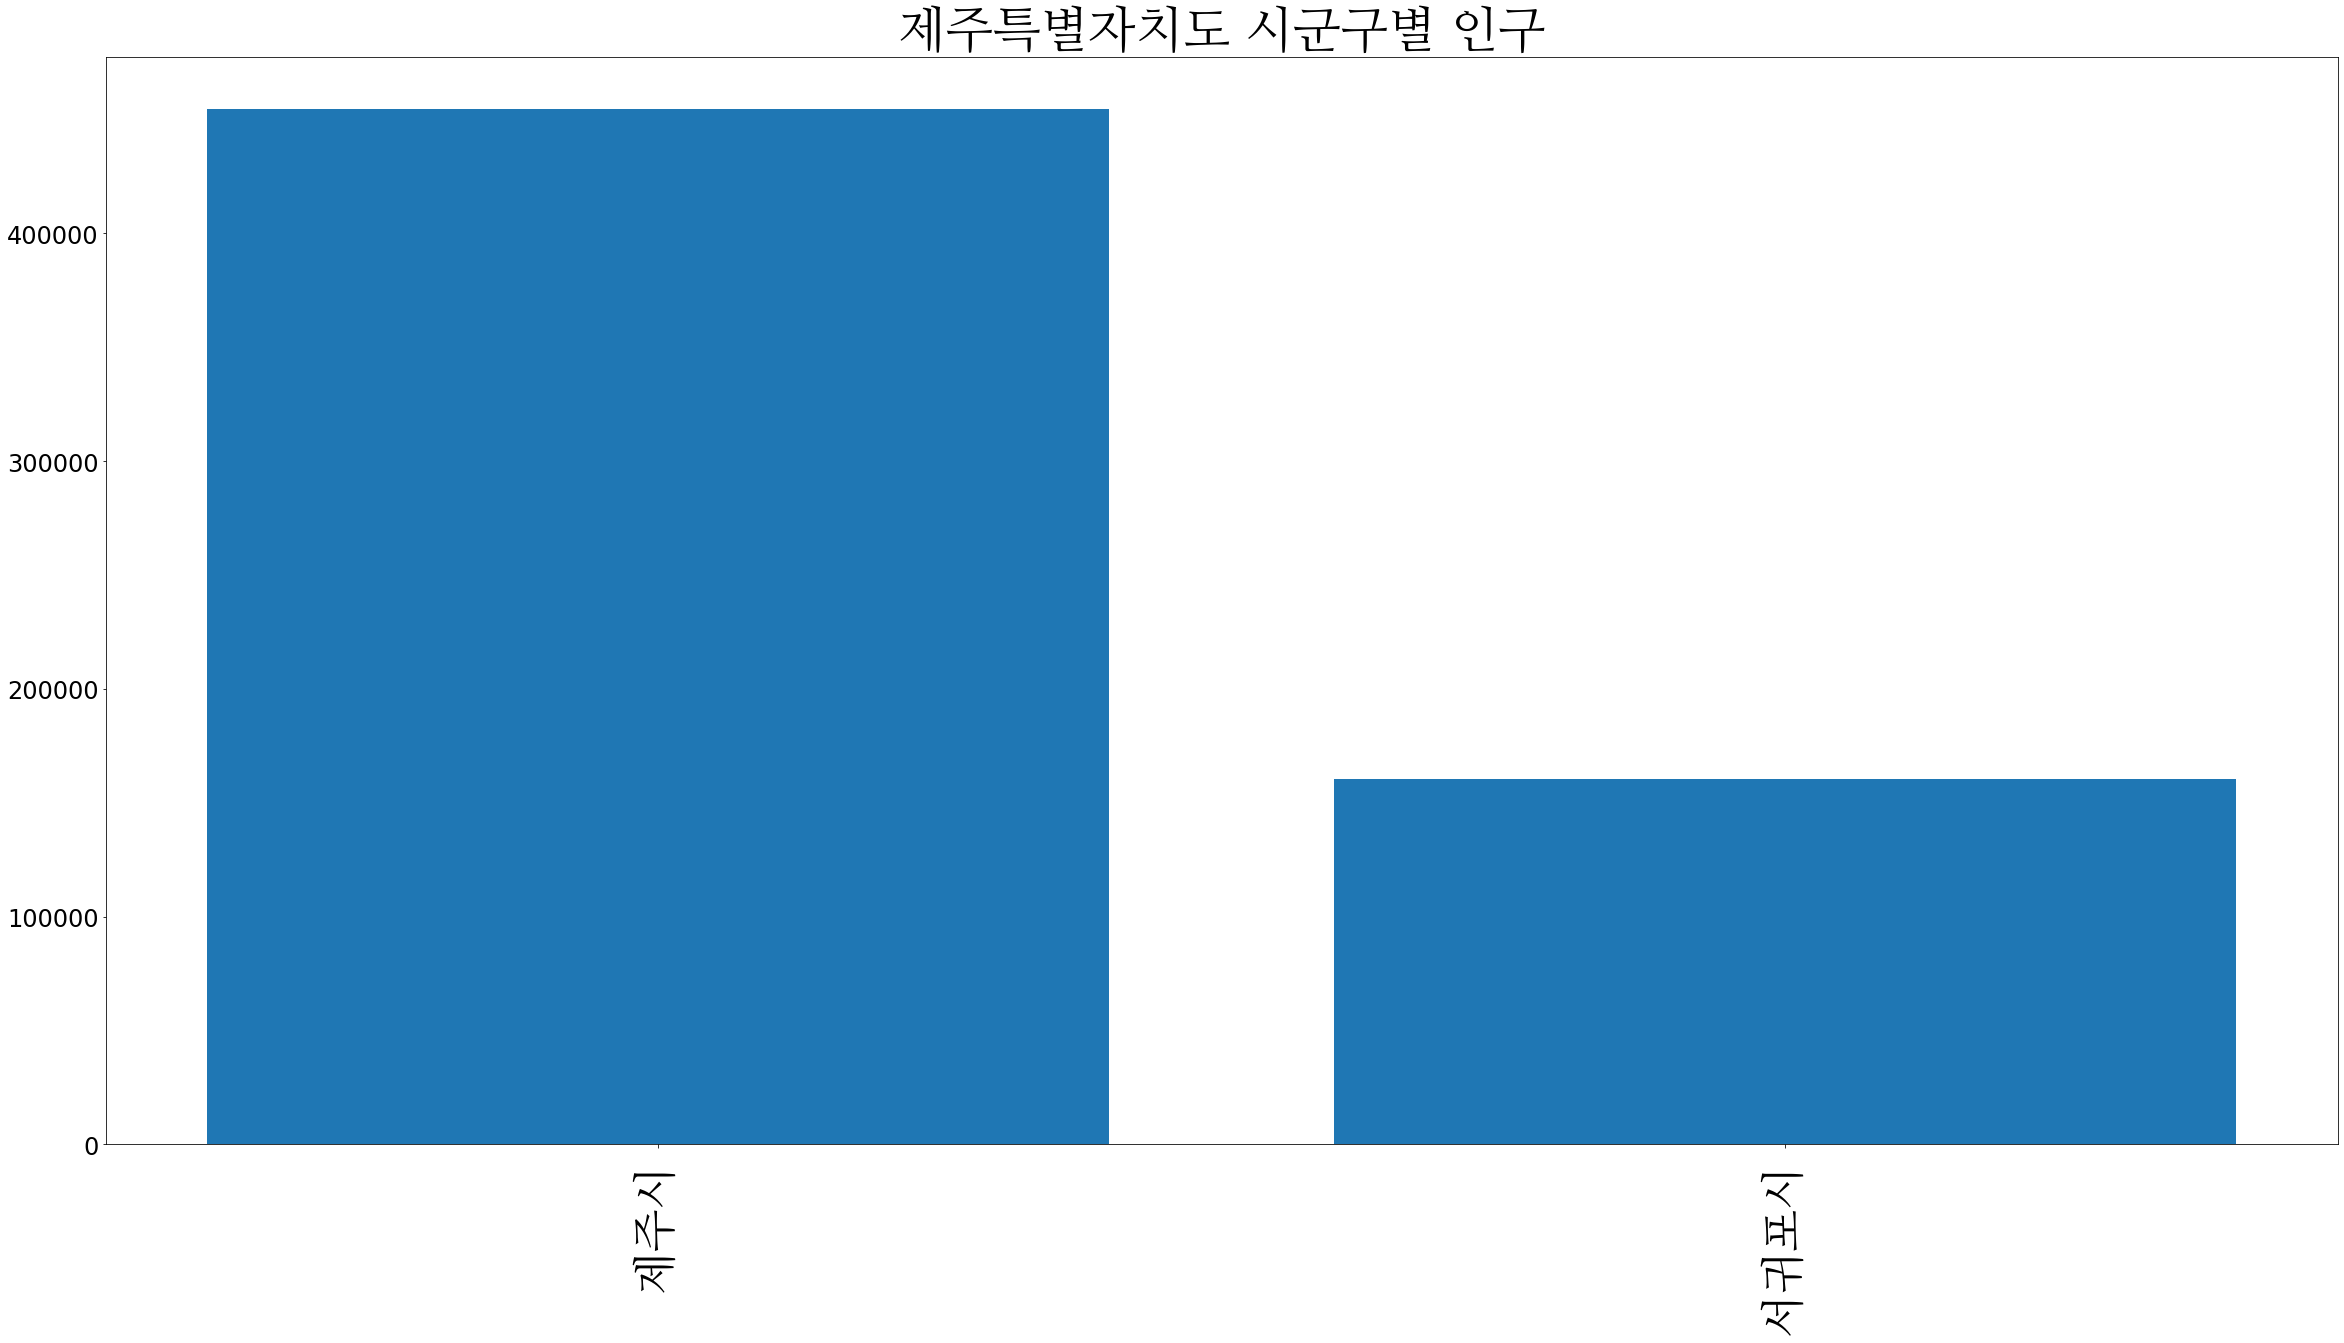

In [24]:
f = open('data_population.csv', encoding='cp949')
data = csv.reader(f)
next(data)

jeju_pop = [] #Population 데이터를 저장할 리스트 생성
jeju_city = [] #city 데이터를 저장할 리스트 생성

for row in data:
    if row[2] != " ": # 결측치값 제거
        if row[1] == '제주특별자치도': #제주특별자치도 해당하는 값이라면
            jeju_pop.append(float(row[3])) # jeju_pop 리스트에 Population 값 추가
            jeju_city.append(str(row[2])) # jeju_city 리스트에 city 값 추가

fontprop = fm.FontProperties(fname=path, size=20)
fontprop1 = fm.FontProperties(fname=path, size=50)
            
plt.figure(figsize=(40, 20))          
plt.bar(jeju_city, jeju_pop)
plt.xticks(jeju_city, fontproperties=fontprop1 , fontsize=45, rotation=90)
plt.title('제주특별자치도 시군구별 인구', fontproperties=fontprop, fontsize=50)

plt.show()